# COGS 108 - Predicting Crop Supply of Developing Countries Given Environmental Changes

# Names

- Vineet Tallavajhala
- Anudeep Alam
- Arturo Sorensen
- Kyle Carter

## Permissions

* [X] YES - make available
* [  ] NO - keep private

# Overview

Within this project, we inspect the relationship between crop yields in developing countries and different environmental scenarios, specifically scenarios that emphasize continued degradation of the environment (A scenarios) or environmentally friendly futures (B scenarios). We are analyzing baseline data from the years 2000 to 2006 and predicted data computed by the HadCM3 model for the years 2020, 2050, and 2080 under these different scenarios by creating appropriate data visualizations to understand the data. We also conducted statistical tests to determine the signficance of our results, analyzed the data geospatially, conducted regression analysis, and created models that predict 1. the actual weighted crop yield prediction in 2080 and 2. whether a country could be classified as developing or not. Our conclusion from our results is that there is a statistically significant difference for crop yields means under different scenarios for year tested and that crop yield changes most prominently affect developing countries. 

## Going Above and Beyond (Extra Credit)

To go above and beyond within this project, we took our regression analysis beyond inferential analysis and created predictive models that predict the 2080 projection of weighted crop yields (around 8 different models built into this pipeline) as well as a classifier for developing and developed countries. From the classifier, we also used feature importances to 1. make our model more interpretable and 2. use these feature importances to make further analysis as is illustrated in section 5. Moreover, our training of the model for both tasks produced fairly "good" metrics (70-91% accuracy for regression task and 82% accuracy for classification) in terms of what we were hoping to achieve without overfitting (as proved through our cross validation). Lastly, our use of geopandas and geospatial analysis could also be seen as going above and beyond as we also did not neccessarily learn this in the scope of this class. We created user friendly maps that are highly readable to better understand the distrubutions of crop yields. 

<a id='research_question'></a>
# Research Question

*Is it possible to predict the supply of crops of developing countries in future years for various environmental scenarios using crop yield and emissions data? In this project, we aim to examine relationships between crop current crop yields (wheat rice, and maize prudction) and projections of supply data (changes in wheat, rice, and corn production for the years 2020, 2050, and 2080 under various emissions and environment scenarios).*

<a id='background'></a>

## Background & Prior Work

In recent years, the effect of climate change has become more and more evident with the growth of wildfire, volatile temperatures, melting glaciers, and increasing water levels. One of, if not the most prominent, speculated detriments of warming is its effect on global food supplies. As the climate becomes more inhabitable through increased temperatures and natural disasters, the land on which farmers grow crops is becoming less and less arable, decreasing overall crop production. This has profound impacts on areas which already have foot shortage problems (usually developing countries).

One 2017 Study analyzed the impact of climate change on four agricultural crops: wheat, maize, and soybean (Zhao et al.). These four crops make up two thirds of human caloric intake, and thus are important to analyze. The study concluded that without “Without CO2 fertilization, effective adaptation, and genetic improvement, each degree-Celsius increase in global mean temperature would, on average, reduce global yields of wheat by 6.0%, rice by 3.2%, maize by 7.4%, and soybean by 3.1%.” However in some locations there were some positive estimates.

Even with the immense literature that exists to illuminate the effects of environmental changes on food supply, many critics still hold skepticism towards the correlation. Therefore, research in the field must further be conducted to better understand the correlation between environmental changes and food supplies in developing countries.

References (include links):
- 1) De Salvo, Maria, Diego Begalli, and Giovanni Signorello. "Measuring the effect of climate change on agriculture: A literature review of analytical models." Journal of development and agricultural economics 5.12 (2013): 499-509. https://academicjournals.org/journal/JDAE/article-full-text-pdf/6ABEE2F41757
- 2.) Zhao, C., Liu, B., Piao, S., Wang, X., Lobell, D. B., Huang, Y., Huang, M., Yao, Y., Bassu, S., Ciais, P., Durand, J.-L., Elliott, J., Ewert, F., Janssens, I. A., Li, T., Lin, E., Liu, Q., Martre, P., Müller, C., … Asseng, S. (2017, August 29). Temperature increase reduces global yields of major crops in four independent estimates. PNAS. Retrieved October 24, 2021, from https://www.pnas.org/content/114/35/9326.

# Hypothesis


We predict that there will a statistically significant difference in the mean crop yields between the different scenarios (A and B) in the years 2020, 2050, 2080. The reasoning behind our hypothesis is that A scenarios over time will become less productive since fossil fuel emissions will have a negative impact on the environment necessary for crops to flourish. On the other hand, B scenarios over time will be more productive since the focus on a clean technology and environmental sustainability will have a positive impact on the environment necessary for crops to flourish

# Dataset(s)

*The Data we will use to answer our question is to compare the percent yield changes of rice, wheat, maize in countries based on climate Emission Scenarios in certain years outputted by the HadCM3 model. This data observes XX countries, and has percent yield changes of wheat, rice, maize based on Climate Emission Scenarios, in years 2020, 2050, 2080 relative to baseline yield ( average yield between 1970-2000). Each of these projections for different years are under different climate scenarios. These are then compared to 1990 production values. Also included are the wheat, rice, maize production averages from 2000 to 2006 as a baseline.*

- Dataset Name: Potential Impact of Climate Change on World Food Supply, V1
- Link to the dataset:https://data.world/nasa/potential-impacts-of-climate-change-on-world-food-supply-v-1
- Number of observations: 166 (reduced after cleaning to 154)
 



# Setup

In [67]:
## YOUR CODE HERE
#Import pandas to handle data frames and numpy to store numeric data and perform numeric analysis.
import pandas as pd
import numpy as np

#Import visualiztion packages
import seaborn as sns
import matplotlib.pyplot as plt

# Import packages for statistical analysis
from scipy import stats
import geopandas as gpd

# Import Packages for regression analysis
import patsy
import statsmodels.api as sm

# Import packages for Machine Learning
from sklearn.model_selection import train_test_split

# Import Regression Models
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

# Import Classification Models
from sklearn.linear_model import LogisticRegression

# Import packages to score Machine Learning models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Data Cleaning

Prior to actually being able to read the data, it came as an XLS file (which is an excel workbook file) with multiple sheets. In order to put the data in a tidy format, I extracted the sheet I needed into a sepreate excel sheet and converted it to CSV. With the CSV, I read it using pandas read_csv functionality, and then continued cleaning on the created DF. A data dictionary is also available in the excel sheet that we will use to navigate the columns and understand what each feature is telling us. This data dictionary is available in the xls file in our repo. 

This gives us our raw uncleaned data, we can see there are many null values and that there are many columns on the right most of the df that are unnamed with all null values. 

In [2]:
df = pd.read_csv('crops_emissions.csv')
df.head(5)

,BLS_2_Countries_(SRES)_ABBREVNAME,Fips_code,ISO3v10,WH_2000,RI_2000,MZ_2000,WHA1F2020,RIA1F2020,MZA1F2020,ActChWHA1F2020,...,B2A2080,B2B2020,B2B2050,B2B2080,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162
0,Afghanistan,AF,AFG,2750142.86,337285.71,265285.71,-1.22,-3.22,-5.54,NaN,...,-1.90,-0.74,-0.95,-3.49,NaN,NaN,NaN,NaN,NaN,NaN
1,Alaska (same as Canada),02,USA,NaN,NaN,NaN,6.53,4.53,-0.03,NaN,...,1.58,0.75,0.40,0.77,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,AL,ALB,274685.71,NaN,212814.29,4.19,2.19,-1.68,11520.95,...,1.14,0.21,0.56,1.45,NaN,NaN,NaN,NaN,NaN,NaN
3,Algeria,AG,DZA,2157083.86,300.00,1249.14,1.35,-0.65,-4.30,NaN,...,-1.60,0.08,0.05,-3.42,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AO,AGO,4000.00,7791.57,543685.29,1.35,-0.65,-4.30,NaN,...,-4.35,-1.81,-2.53,-6.43,NaN,NaN,NaN,NaN,NaN,NaN


#### Dropping rows and columns

We first wanted to drop the row which has the header names duplicated

In [3]:
df = df.drop(165, axis = 0)

We next want to drop all of the columns that are called unnamed and have all null values

In [4]:
df = df.drop([col for col in df.columns if 'Unnamed' in col], axis = 1)

In [5]:
df.head(5)

,BLS_2_Countries_(SRES)_ABBREVNAME,Fips_code,ISO3v10,WH_2000,RI_2000,MZ_2000,WHA1F2020,RIA1F2020,MZA1F2020,ActChWHA1F2020,...,A2C2080,B1A2020,B1A2050,B1A2080,B2A2020,B2A2050,B2A2080,B2B2020,B2B2050,B2B2080
0,Afghanistan,AF,AFG,2750142.86,337285.71,265285.71,-1.22,-3.22,-5.54,NaN,...,-2.08,-0.51,-0.83,-1.48,-0.99,-1.69,-1.90,-0.74,-0.95,-3.49
1,Alaska (same as Canada),02,USA,NaN,NaN,NaN,6.53,4.53,-0.03,NaN,...,2.90,0.65,1.16,0.89,0.39,1.17,1.58,0.75,0.40,0.77
2,Albania,AL,ALB,274685.71,NaN,212814.29,4.19,2.19,-1.68,11520.95,...,2.58,0.05,0.57,0.81,0.30,0.49,1.14,0.21,0.56,1.45
3,Algeria,AG,DZA,2157083.86,300.00,1249.14,1.35,-0.65,-4.30,NaN,...,-2.37,0.11,0.24,-0.22,-0.29,-0.87,-1.60,0.08,0.05,-3.42
4,Angola,AO,AGO,4000.00,7791.57,543685.29,1.35,-0.65,-4.30,NaN,...,-5.41,-1.60,-2.36,-3.21,-2.41,-3.43,-4.35,-1.81,-2.53,-6.43


##### Data Type Cleaning

Investigating the data types reveals that pandas kept many of the numeric columns as objects when they should be floats. In the following cells we decided to convert these columns to floats to allow for easier analysis in future parts

In [7]:
dtypes = df.dtypes
cols = df.columns
non_numeric_cols = ['COUNTRY', 'BLS_2_Countries_(SRES)_ABBREVNAME', 'Fips_code', 'ISO3v10']
numeric_cols = [col for col in cols if col not in non_numeric_cols]
for col in numeric_cols:
    df[col] = df[col].astype(float)
# we can see the data types are cleaned
df.dtypes

BLS_2_Countries_(SRES)_ABBREVNAME     object
Fips_code                             object
ISO3v10                               object
WH_2000                              float64
RI_2000                              float64
                                      ...   
B2A2050                              float64
B2A2080                              float64
B2B2020                              float64
B2B2050                              float64
B2B2080                              float64
Length: 157, dtype: object

In [8]:
# This is the cleaned data
df.head()

,BLS_2_Countries_(SRES)_ABBREVNAME,Fips_code,ISO3v10,WH_2000,RI_2000,MZ_2000,WHA1F2020,RIA1F2020,MZA1F2020,ActChWHA1F2020,...,A2C2080,B1A2020,B1A2050,B1A2080,B2A2020,B2A2050,B2A2080,B2B2020,B2B2050,B2B2080
0,Afghanistan,AF,AFG,2750142.86,337285.71,265285.71,-1.22,-3.22,-5.54,NaN,...,-2.08,-0.51,-0.83,-1.48,-0.99,-1.69,-1.90,-0.74,-0.95,-3.49
1,Alaska (same as Canada),02,USA,NaN,NaN,NaN,6.53,4.53,-0.03,NaN,...,2.90,0.65,1.16,0.89,0.39,1.17,1.58,0.75,0.40,0.77
2,Albania,AL,ALB,274685.71,NaN,212814.29,4.19,2.19,-1.68,11520.95,...,2.58,0.05,0.57,0.81,0.30,0.49,1.14,0.21,0.56,1.45
3,Algeria,AG,DZA,2157083.86,300.00,1249.14,1.35,-0.65,-4.30,NaN,...,-2.37,0.11,0.24,-0.22,-0.29,-0.87,-1.60,0.08,0.05,-3.42
4,Angola,AO,AGO,4000.00,7791.57,543685.29,1.35,-0.65,-4.30,NaN,...,-5.41,-1.60,-2.36,-3.21,-2.41,-3.43,-4.35,-1.81,-2.53,-6.43


In [9]:
# create a data frame which has the descriptions for each column in the cleaned developing data frame
data_dictionary = pd.read_csv('data_dictionary.csv')

We now have the data dictionary that will better enable our EDA in the next section by crafting precise definitions for different columns

In [10]:
data_dictionary.head()

,Data filenames,Example,Description
0,BLS_2_Countries_(SRES)_ABBREVNAME,Australia,country name
1,Fips_code,AS,country code
2,WH_2000,"20,069,730",wheat production average 2000 to 2006 in t (FAO)
3,RI_2000,"891,259",rice production average 2000 to 2006 in t (FAO)
4,MZ_2000,"367,102",maize production average 2000 to 2006 in t (FAO)


#### Cleaning the Missing Data
We decided to fill the numeric missing data with the mean (mean imputation) so that the large number of 0's in various columns do not have a large effect on the results of our analysis. 

In [11]:
for col in numeric_cols:
    mean_val = df[col].mean()
    df[col].fillna(value = mean_val, inplace = True)

#### Querying Developing countries


In [12]:
developed = ['United States', 'Alaska (same as Canada)', 'China',
             'Canada', 'France', 'United Kingdom', 'Sweden',
             'Russia', 'Australia', 'Japan', 'Denmark', 'Iceland',
             'New Zealand', 'Norway', 'Switzerland', 'Ireland', 'Germany',
             'Netherlands', 'Singapore', 'Finland', 'Belgium', 'Austria',
             'Israel', 'Slovenia', 'South Korea', 'Spain', 'Czechia', 'Malta',
             'Italy', 'Estonia', 'United Arab Emirates', 'Greece', 'Cyprus',
             'Lithuania', 'Poland', 'Latvia'
            ]
df_developing = df[~df['BLS_2_Countries_(SRES)_ABBREVNAME'].isin(developed)]
# reset the index for easier use
df_developing.reset_index(inplace = True)
df_developing.drop('index', axis = 1, inplace = True)

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Now the data is fairly clean, I would say that creating more interpretable column names would be useful to further clean the data. I conducted the steps and preprocessing shown above to get to this format: dropping unneccssary rows and columns, filling null values with means, and querying to only include country codes.

In [13]:
df_developing.head()

,BLS_2_Countries_(SRES)_ABBREVNAME,Fips_code,ISO3v10,WH_2000,RI_2000,MZ_2000,WHA1F2020,RIA1F2020,MZA1F2020,ActChWHA1F2020,...,A2C2080,B1A2020,B1A2050,B1A2080,B2A2020,B2A2050,B2A2080,B2B2020,B2B2050,B2B2080
0,Afghanistan,AF,AFG,2750142.86,3.372857e+05,265285.71,-1.22,-3.22,-5.54,10462.034348,...,-2.08,-0.51,-0.83,-1.48,-0.99,-1.69,-1.90,-0.74,-0.95,-3.49
1,Albania,AL,ALB,274685.71,5.591354e+06,212814.29,4.19,2.19,-1.68,11520.950000,...,2.58,0.05,0.57,0.81,0.30,0.49,1.14,0.21,0.56,1.45
2,Algeria,AG,DZA,2157083.86,3.000000e+02,1249.14,1.35,-0.65,-4.30,10462.034348,...,-2.37,0.11,0.24,-0.22,-0.29,-0.87,-1.60,0.08,0.05,-3.42
3,Angola,AO,AGO,4000.00,7.791570e+03,543685.29,1.35,-0.65,-4.30,10462.034348,...,-5.41,-1.60,-2.36,-3.21,-2.41,-3.43,-4.35,-1.81,-2.53,-6.43
4,Argentina,AR,ARG,14503088.71,9.147949e+05,15968048.57,3.42,1.42,-5.08,496591.530000,...,-0.36,-0.13,-0.01,-0.24,0.14,0.56,0.17,-0.19,-0.79,0.54


# Data Analysis & Results (EDA)

## EDA

#### Top level definitions crucial to understanding data

The SRES scenarios are baseline scenarios which assume that no future measures are taken to limit green house gas emmissions. Each describe different frameworks the world may adopt as emphasized below:

- SRES A1FI Scenario:
    - Rapid Economic Growth 
    - cap of global population at 9 billion around 2050 
    - quick diffusion of new technologies, more interconnected world
    - A1F1 specifically emphasizes the effect of fossil fuels. 
- SRES A2 Scenarios:
    - A2 focuses on a world of independently operating, self-reliant nations. 
    - Continuously increasing population. 
    - Regionally oriented economic development.
    - High emissions. 
- SRES B1 Family Scenarios:
    - Rapid economic growth as in A1, but with rapid changes towards a service and information economy.
    - Population rising to 9 billion in 2050 and then declining as in A1. 
    - Reductions in material intensity and the introduction of clean and resource efficient technologies. 
    - An emphasis on global solutions to economic, social and environmental stability.
- SRES B2 Family Scenarios:
    - Continuously increasing population, but at a slower rate than in A2.
    - Emphasis on local rather than global solutions to economic, social and environmental stability.
    - Intermediate levels of economic development.
    - Less rapid and more fragmented technological change than in A1 and B1.

The different features refer to the scenario they correspond to by including the code within their name. For example the 'ActChWHB2a2050' feature refers to the B2a column for wheat production in 2050. For the sake of this project we will focus less on interfamilial differences (B2a vs B2b) and instead focus on differences in the A1F1, A2, B1, and B2 scenarios. We will also make seperate ML models at the end based on various scenarios to craft predictions about what yield changes will be and classifying a country as developed or not developed based on their agricultural outputs. 

In [14]:
# We will first create lists of columns that have similar characteristics (for example the 2020 predictions, all wheat productions, etc.)
baselines = [ 'WH_2000', 'RI_2000','MZ_2000']
predictions_2020 = [col for col in cols if '2020' in col]
predictions_2050 = [col for col in cols if '2050' in col]
predictions_2080 = [col for col in cols if '2080' in col]
wheat_yield_change = [col for col in cols if 'WH' in col and 'Act' not in col]
rice_yield_change = [col for col in cols if 'RI' in col and 'Act' not in col]
maize_yield_change = [col for col in cols if 'MZ' in col and 'Act' not in col]
wheat_total_change = [col for col in cols if 'WH' in col and 'Act'  in col]
rice_total_change = [col for col in cols if 'RI' in col and 'Act'  in col]
maize_total_change = [col for col in cols if 'MZ' in col and 'Act'  in col]
a_scenarios = list(df_developing.iloc[:, list(range(136, 148))].columns)
b_scenarios = list(df_developing.iloc[:, list(range(148, 155))].columns)

### 1. Understanding distributions of univariate data

Helper functions to assign titles of graphs from column names

In [99]:
def scenario_getter(title):
    if '1F'in title:
        return 'A1FI'
    if 'A2a' in title or 'A2A' in title:
        return 'A2a'
    if 'A2b' in title or 'A2B' in title:
        return 'A2b' 
    if 'A2c' in title or 'A2C' in title:
        return 'A2c' 
    if 'B1a' in title or 'B1A' in title:
        return 'B1a'
    if 'B2a' in title or 'B2A' in title:
        return 'B2a'
    if 'B2b' in title or 'B2B' in title:
        return 'B2b'
def crop_getter(title):
    if 'WH' in title:
        return 'Wheat'
    if 'RI' in title:
        return 'Rice'
    if 'MZ' in title:
        return 'Maize'
def year_getter(title):
    if '2020' in title:
        return '2020'
    if '2050' in title:
        return '2050'
    if '2080' in title:
        return '2080'

#### Distribution of crop yield predictions for 2020

Decided to remove deprecation warnings so that the graph outputs would take less space, and would look nicer for the reader

In [18]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 

#### Note that the term "Crop Yields" refers to the percentage change of crop yields from baseline estimates (which were gathered from a countries crop yields between the years 2000 and 2006) and are presented below. 

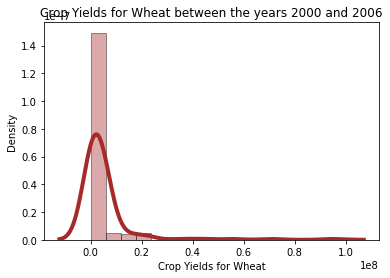

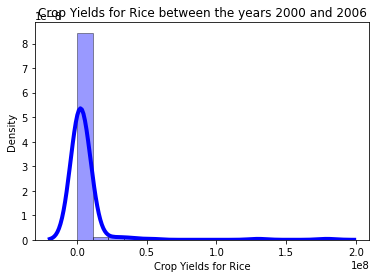

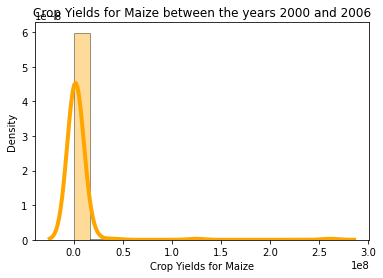

In [19]:
# First we will graph the three baseline distrutions for each crop 
colors = ['brown', 'blue', 'orange']
for x, col in enumerate(baselines):
    ax = sns.distplot(df[col], hist=True, kde=True, 
              bins=int(len(df[col])/10),
              color=colors[x],hist_kws={'edgecolor':'black'}, 
              kde_kws={'linewidth':4})
    temp_title = 'Crop Yields for ' + crop_getter(col) + ' between the years 2000 and 2006'
    ax.set(xlabel='Crop Yields for ' + crop_getter(col), ylabel='Density', title=temp_title)
    plt.show()

**Analysis:** These graphs seem to be relatively normal, but have large outliers in each one (as we can can see long tails in each that might skew the mean higher). Investigating individual scenarios and the yield projections will lend to more insightful information, so we decided to look into these projections next.

**Crop Yield Proejections for 2020 under various scenarios**

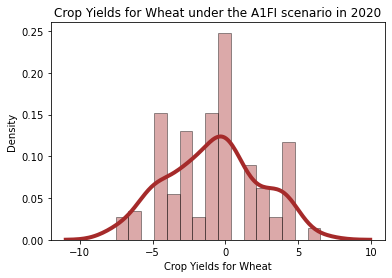

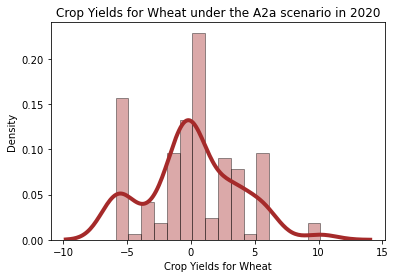

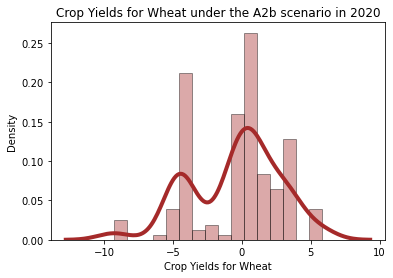

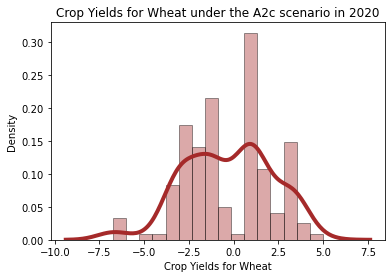

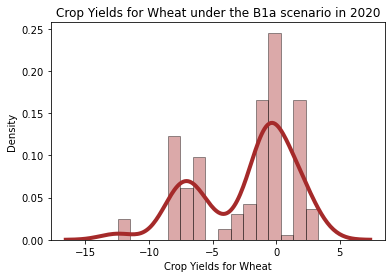

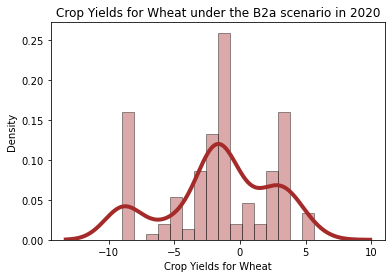

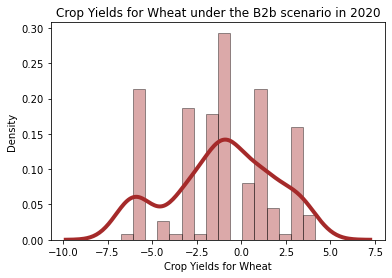

In [20]:
# Create histograms of wheat yield predictions for 2020 for various scenarios
for col in predictions_2020:
    if col in wheat_yield_change:
        ax = sns.distplot(df[col], hist=True, kde=True, 
                  bins=int(len(df[col])/10),
                  color='brown',hist_kws={'edgecolor':'black'}, 
                  kde_kws={'linewidth':4})
        temp_title = 'Crop Yields for ' + crop_getter(col) + ' under the ' + scenario_getter(col) + ' scenario in 2020'
        ax.set(xlabel='Crop Yields for ' + crop_getter(col), ylabel='Density', title=temp_title)
        plt.show()

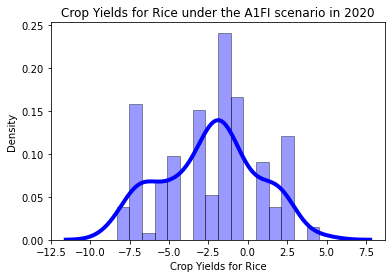

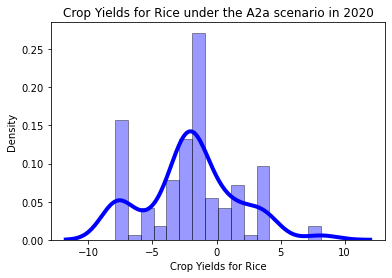

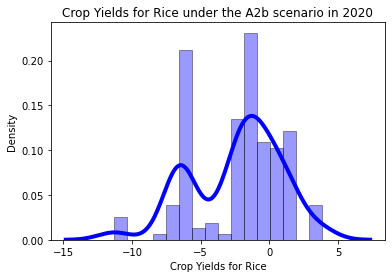

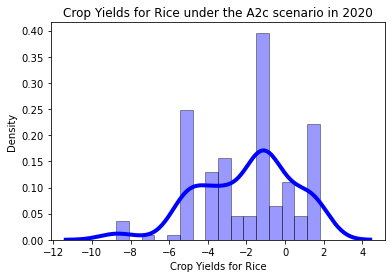

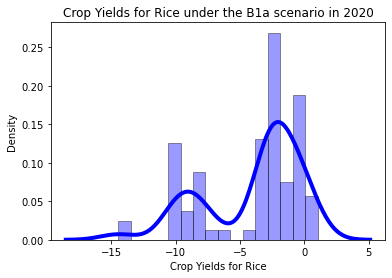

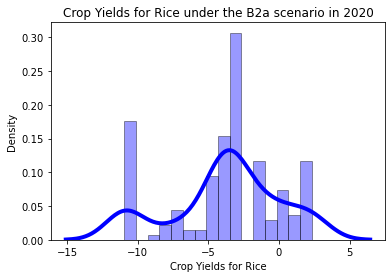

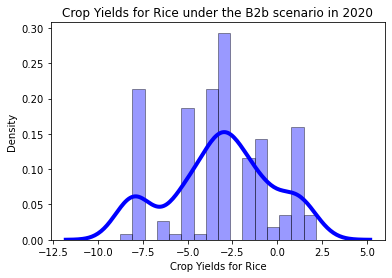

In [21]:
# Create histograms of rice yield predictions for 2020 for various scenarios
for col in predictions_2020:
    if col in rice_yield_change:
        ax = sns.distplot(df[col], hist=True, kde=True, 
                  bins=int(len(df[col])/10),
                  color='blue',hist_kws={'edgecolor':'black'}, 
                  kde_kws={'linewidth':4})
        temp_title = 'Crop Yields for ' + crop_getter(col) + ' under the ' + scenario_getter(col) + ' scenario in 2020'
        ax.set(xlabel='Crop Yields for ' + crop_getter(col), ylabel='Density', title=temp_title)
        plt.show()

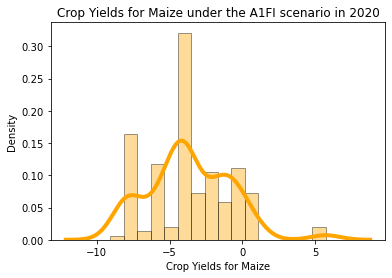

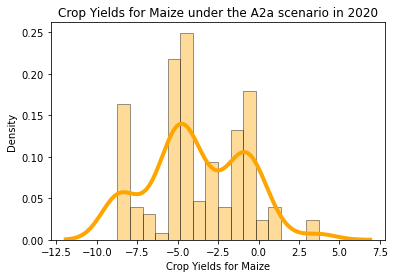

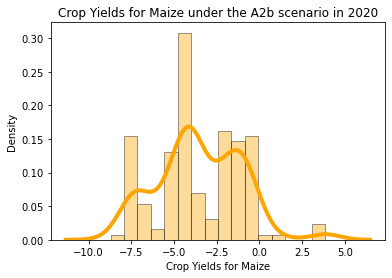

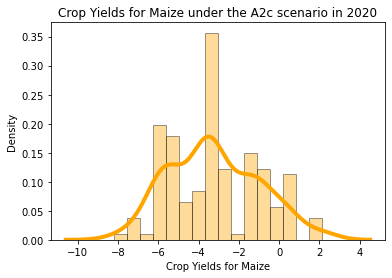

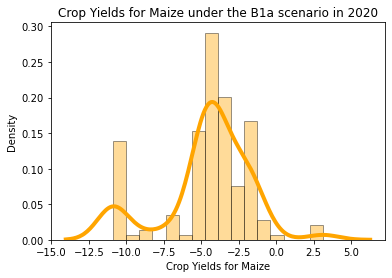

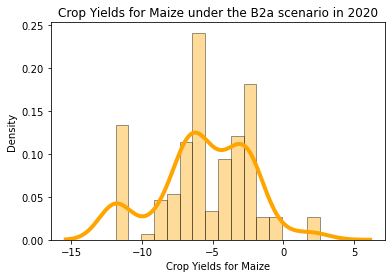

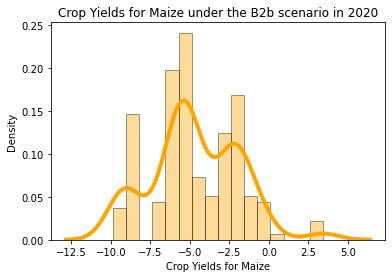

In [22]:
# Create histograms of maize yield predictions for 2020 for various scenarios
for col in predictions_2020:
    if col in maize_yield_change:
        ax = sns.distplot(df[col], hist=True, kde=True, 
                  bins=int(len(df[col])/10),
                  color='orange',hist_kws={'edgecolor':'black'}, 
                  kde_kws={'linewidth':4})
        temp_title = 'Crop Yields for ' + crop_getter(col) + ' under the ' + scenario_getter(col) + ' scenario in 2020'
        ax.set(xlabel='Crop Yields for ' + crop_getter(col), ylabel='Density', title=temp_title)
        plt.show()

**Analysis on distrubtions of 2020 scenario features:** From the projections of crop yields in 2020 under various scenarios we can see that most are concentrated around a mean of 0 which indicates that on average, the change in crop yields for most scenarios tends to be around 0 on average. Notably however, the A2a scenario seems to offer a wider range of results with differences of about 25% crop yield between the most negative and most positive changes in crop yields. We can also see from comparing the yield for various crops that wheat tends to be more volatile in changes under projections while maize and rice tend to only change between +/- 5 percent under most scenarios.

#### Distribution of crop yield predictions for 2050

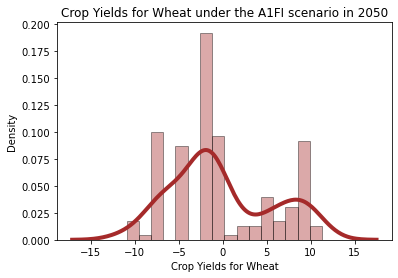

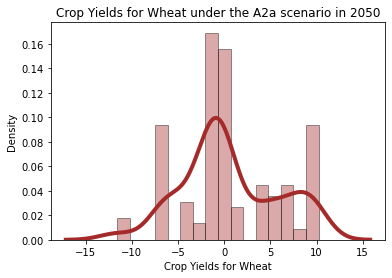

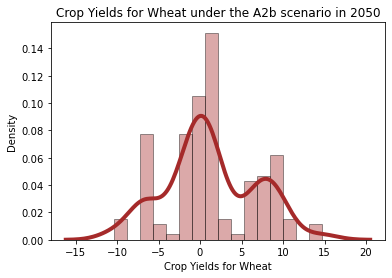

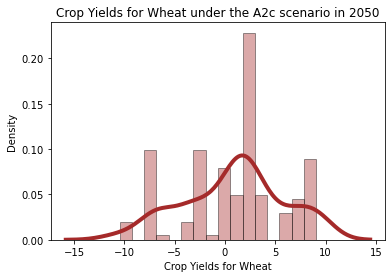

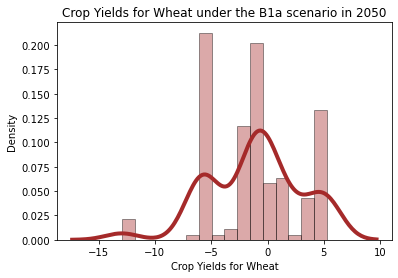

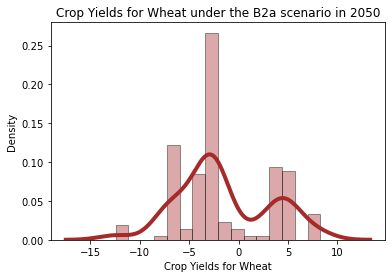

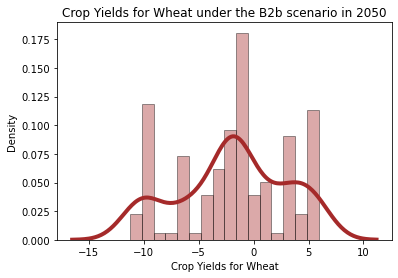

In [23]:
# Create histograms of wheat yield predictions for 2050 for various scenarios
for col in predictions_2050:
    if col in wheat_yield_change:
        ax = sns.distplot(df[col], hist=True, kde=True, 
                  bins=int(len(df[col])/10),
                  color='brown',hist_kws={'edgecolor':'black'}, 
                  kde_kws={'linewidth':4})
        temp_title = 'Crop Yields for ' + crop_getter(col) + ' under the ' + scenario_getter(col) + ' scenario in 2050'
        ax.set(xlabel='Crop Yields for ' + crop_getter(col), ylabel='Density', title=temp_title)
        plt.show()

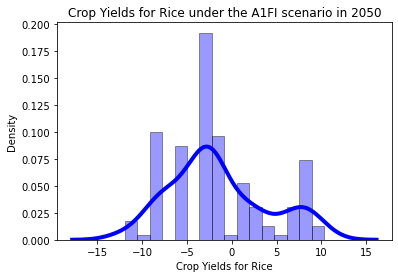

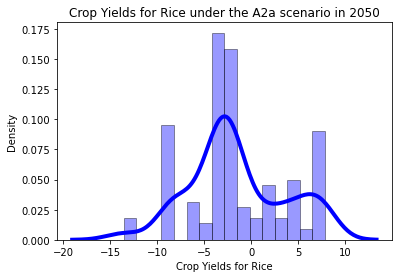

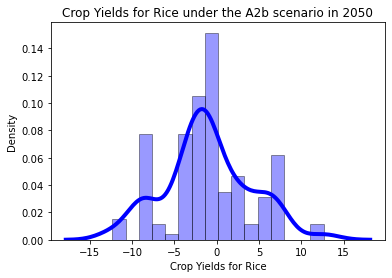

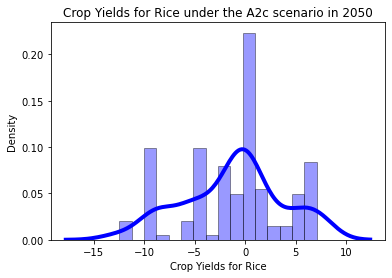

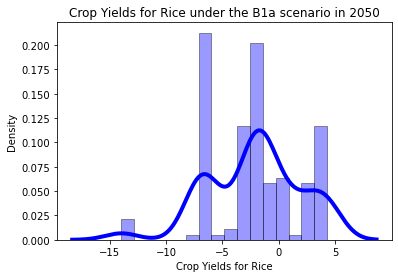

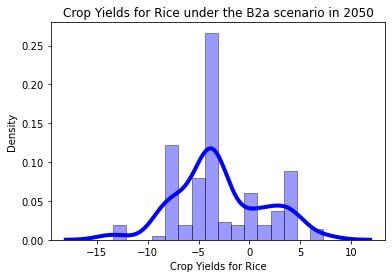

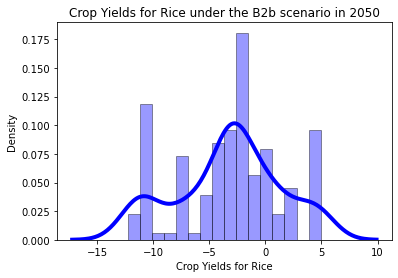

In [24]:
# Create histograms of maize yield predictions for 2050 for various scenarios
for col in predictions_2050:
    if col in rice_yield_change:
        ax = sns.distplot(df[col], hist=True, kde=True, 
                  bins=int(len(df[col])/10),
                  color='blue',hist_kws={'edgecolor':'black'}, 
                  kde_kws={'linewidth':4})
        temp_title = 'Crop Yields for ' + crop_getter(col) + ' under the ' + scenario_getter(col) + ' scenario in 2050'
        ax.set(xlabel='Crop Yields for ' + crop_getter(col), ylabel='Density', title=temp_title)
        plt.show()

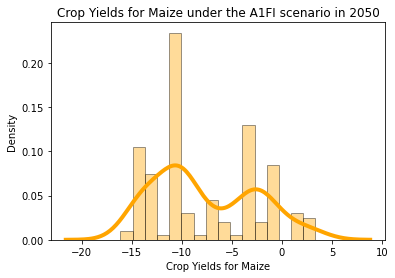

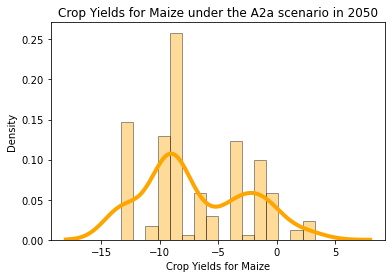

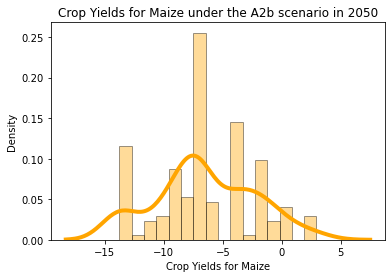

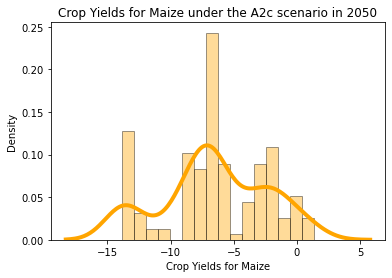

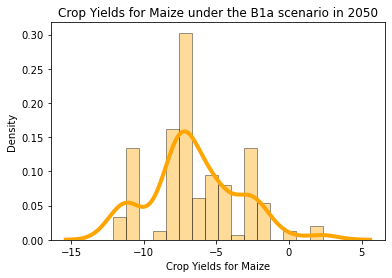

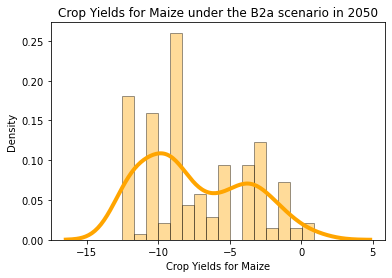

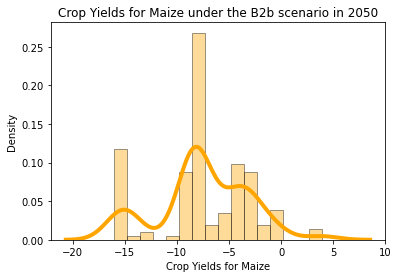

In [25]:
# Create histograms of rice yield predictions for 2050 for various scenarios
for col in predictions_2050:
    if col in maize_yield_change:
        ax = sns.distplot(df[col], hist=True, kde=True, 
                  bins=int(len(df[col])/10),
                  color='orange',hist_kws={'edgecolor':'black'}, 
                  kde_kws={'linewidth':4})
        temp_title = 'Crop Yields for ' + crop_getter(col) + ' under the ' + scenario_getter(col) + ' scenario in 2050'
        ax.set(xlabel='Crop Yields for ' + crop_getter(col), ylabel='Density', title=temp_title)
        plt.show()

**Analysis on distrubtions of 2050 projection variables:** From the projections of crop yields in 2050 under various scenarios we can see that crop yields on average tend to be more volatile when compared to the 2020 projections. This somewhat follows intuition as the data is telling us that as time went on, crop yields changed dramatically from the baseline in 2000-2006 (which represents current time). Moreover, we can also see that the A family scenarios (which emphasize heightened effects of climate change) have a coorelation with leading to negative crop yields. Negative crop yields indicates that with increased emissions and use of fossil fuels (scenario A), less and less crops are projected to be harvested. This trend seems to follow for rice, wheat, and maize. 

#### Distribution of crop yield predictions for 2080

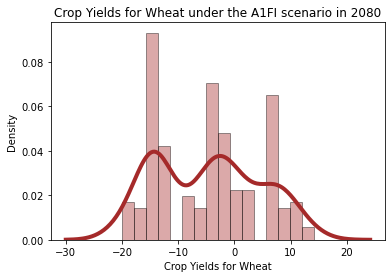

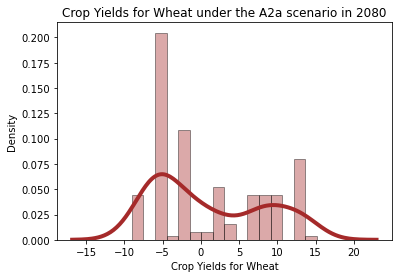

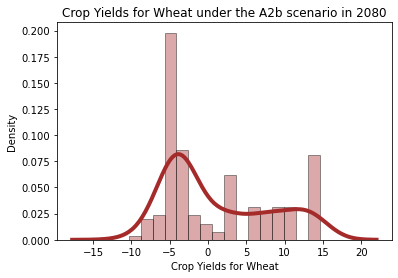

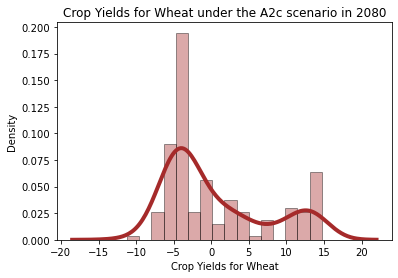

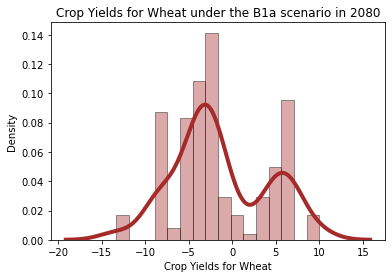

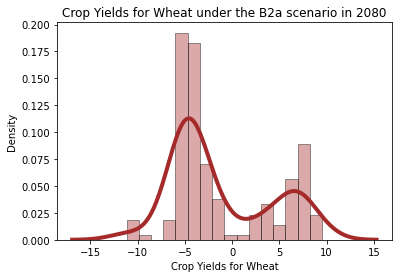

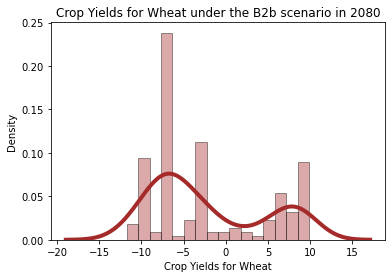

In [26]:
for col in predictions_2080:
    if col in wheat_yield_change:
        ax = sns.distplot(df[col], hist=True, kde=True, 
                  bins=int(len(df[col])/10),
                  color='brown',hist_kws={'edgecolor':'black'}, 
                  kde_kws={'linewidth':4})
        temp_title = 'Crop Yields for ' + crop_getter(col) + ' under the ' + scenario_getter(col) + ' scenario in 2080'
        ax.set(xlabel='Crop Yields for ' + crop_getter(col), ylabel='Density', title=temp_title)
        plt.show()

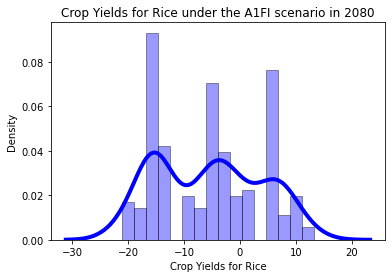

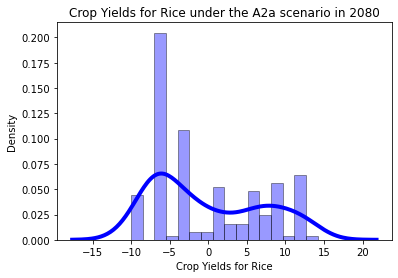

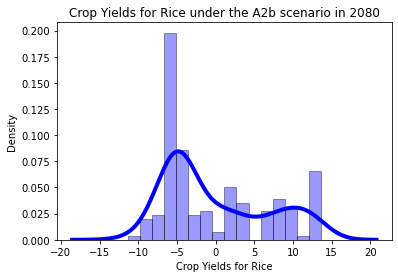

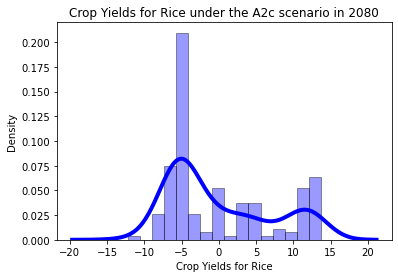

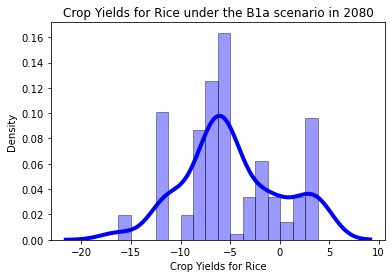

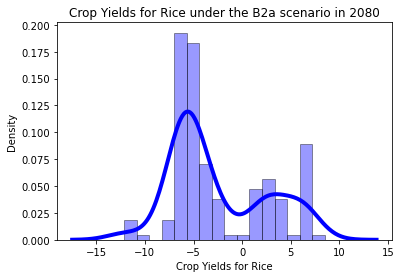

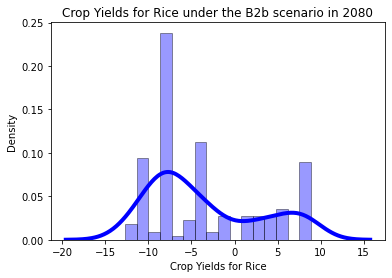

In [27]:
for col in predictions_2080:
    if col in rice_yield_change:
        ax = sns.distplot(df[col], hist=True, kde=True, 
                  bins=int(len(df[col])/10),
                  color='blue',hist_kws={'edgecolor':'black'}, 
                  kde_kws={'linewidth':4})
        temp_title = 'Crop Yields for ' + crop_getter(col) + ' under the ' + scenario_getter(col) + ' scenario in 2080'
        ax.set(xlabel='Crop Yields for ' + crop_getter(col), ylabel='Density', title=temp_title)
        plt.show()

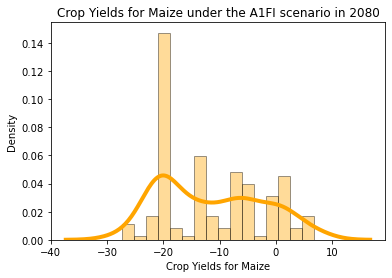

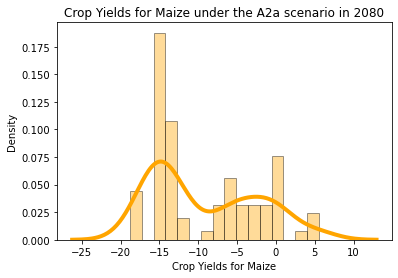

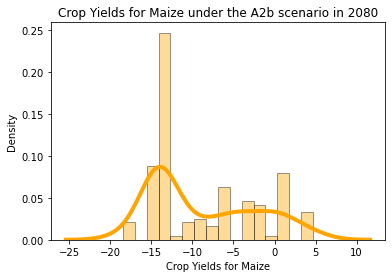

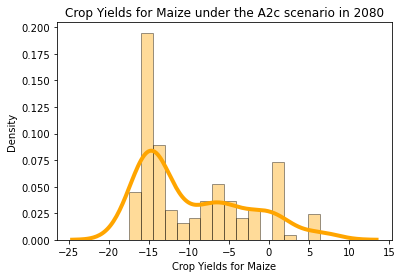

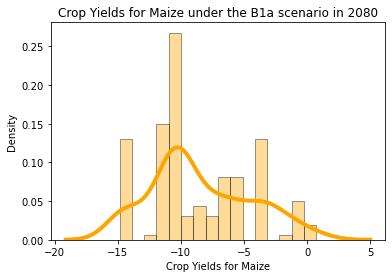

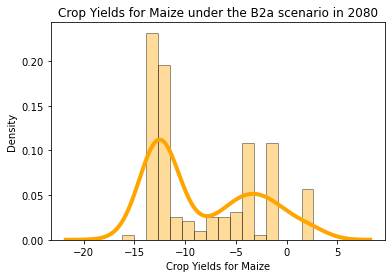

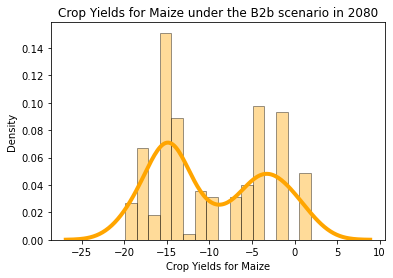

In [28]:
for col in predictions_2080:
    if col in maize_yield_change:
        ax = sns.distplot(df[col], hist=True, kde=True, 
                  bins=int(len(df[col])/10),
                  color='orange',hist_kws={'edgecolor':'black'}, 
                  kde_kws={'linewidth':4})
        temp_title = 'Crop Yields for ' + crop_getter(col) + ' under the ' + scenario_getter(col) + ' scenario in 2080'
        ax.set(xlabel='Crop Yields for ' + crop_getter(col), ylabel='Density', title=temp_title)
        plt.show()

**Analysis on distrubtions of 2080 projection variables:** From the projections of crop yields in 2080 under various scenarios we can conduct similar analysis to our analysis regarding the 2050 projections. That is, A family scenarios seem to have humps (representing concentrations of values) near negative values much higher than of other families. For example, the A1F scenario for maize seems to have changes of around 40% which is much higher than the changes of near 5% in the 2020 projections. Moreover, it is also important to illustrate that even under B family scenarios, crop yields tend to shift negative, but in a less drastic manner. From this analysis, we can conclude that B family scenarios (which emphasize climate change mitigating initatives) does slow the effects of crop yield decrease, but is not enough to grow more crop yields in the future. From this, we can derive that initiatives would help in slowing decreasing crop yields, but the initiatives set forth by B family scenarios along are not enough to stop the ill effects of climate change on crop yields. 

**Looking at Weighted Crop Yield Distribution for each scenario (putting together all of the histograms presented above)**

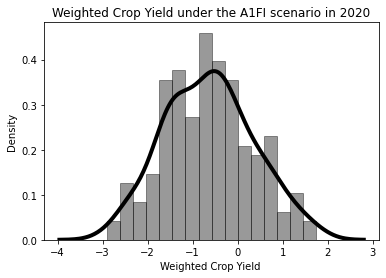

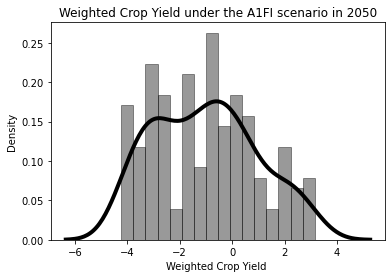

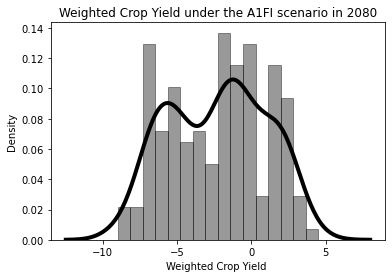

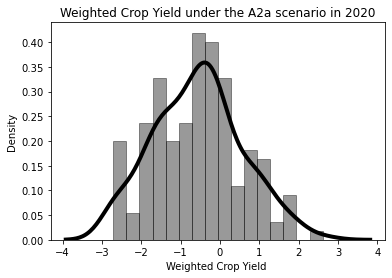

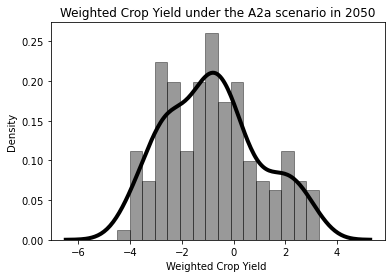

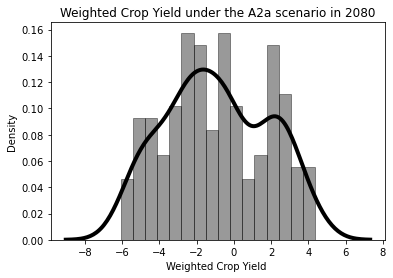

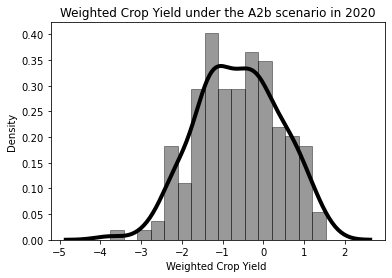

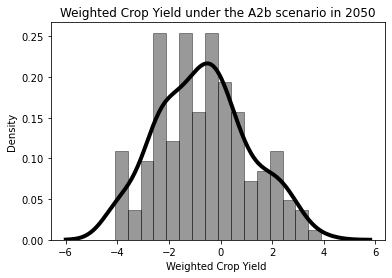

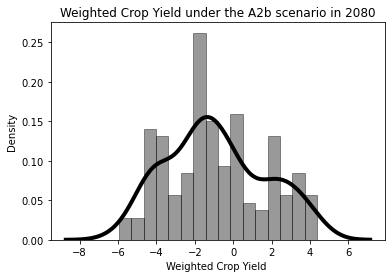

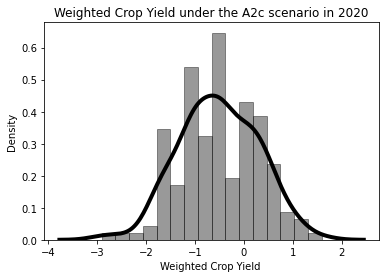

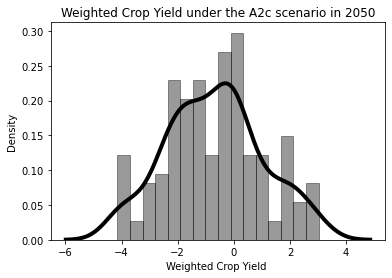

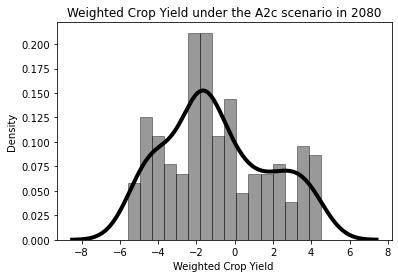

In [29]:
for col in a_scenarios:
    ax = sns.distplot(df[col], hist=True, kde=True, 
              bins=int(len(df[col])/10),
              color='black',hist_kws={'edgecolor':'black'}, 
              kde_kws={'linewidth':4})
    temp_title = 'Weighted Crop Yield' + ' under the ' + scenario_getter(col) + ' scenario in ' + year_getter(col)
    ax.set(xlabel='Weighted Crop Yield ', ylabel='Density', title=temp_title)
    plt.show()

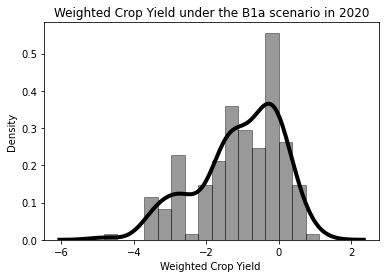

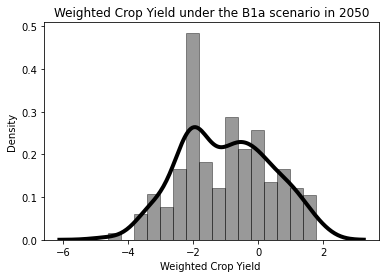

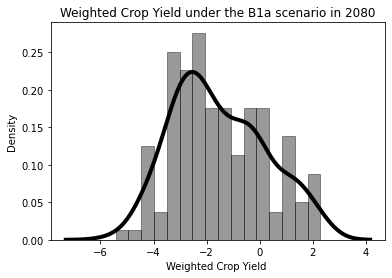

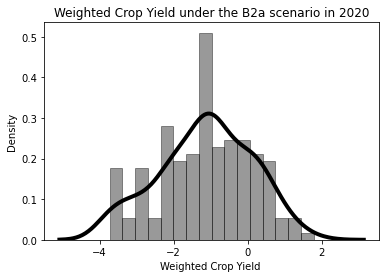

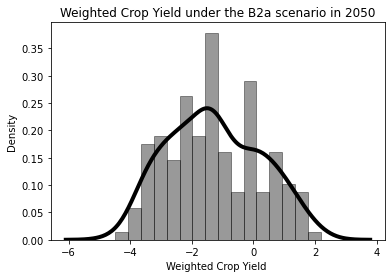

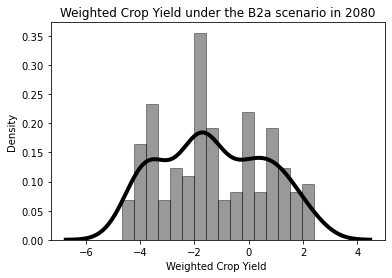

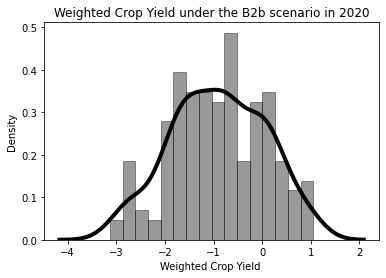

In [30]:
for col in b_scenarios:
    ax = sns.distplot(df[col], hist=True, kde=True, 
              bins=int(len(df[col])/10),
              color='black',hist_kws={'edgecolor':'black'}, 
              kde_kws={'linewidth':4})
    temp_title = 'Weighted Crop Yield' + ' under the ' + scenario_getter(col) + ' scenario in ' + year_getter(col)
    ax.set(xlabel='Weighted Crop Yield ', ylabel='Density', title=temp_title)
    plt.show()

**Analysis on weighted crop yield distributions for each year and scenario**: Investigating the weighted crop yield differences for all countries reveals that when weighting crop yields, the distrubitons seem to get more and more normal for both A and B family scenarios. Looking further, however, it would seem that as years go on (2080 projections), B family scenarios began to centralize (their means) around negative values while A family scenarios stay near a mean of 0 in future years. From these results, it would seem that as time goes on under B family scenarios, crop yields tend to decrease while under A family scenarios crop yields tend to stay around the same amount. To truly garner evidence that illustrates this, we need to conduct a statistical test which is done in the analysis portion of this notebook. 

### 2. Looking for outliers

We saw in the distributions that the baselines seemed to have large outliers (the maximums had a much larger value than most of the data). To investigate outliers in more detail, we decided to find the countries where these outliers coressponded to in order to ensure the data was not fallible. Furthermore, we decided to investigate only the outliers within the baselines (the features with 2000 in them) because we assumed that if the baseline truth was abnormally high or low, the resulting predicitons would also be abnormal/an outlier that needs to be investigated.

In [31]:
# Look at the measures of central tendency to better understand the distributions of individual variables
df_developing.describe()

,WH_2000,RI_2000,MZ_2000,WHA1F2020,RIA1F2020,MZA1F2020,ActChWHA1F2020,ActChRIAIF2020,ActChMZA1F2020,WHA1F2050,...,A2C2080,B1A2020,B1A2050,B1A2080,B2A2020,B2A2050,B2A2080,B2B2020,B2B2050,B2B2080
count,1.330000e+02,1.330000e+02,1.330000e+02,133.000000,133.000000,133.00000,1.330000e+02,1.330000e+02,1.330000e+02,133.00000,...,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,3.575042e+06,4.438768e+06,2.085798e+06,-1.212807,-2.714354,-3.65000,-3.355079e+04,-9.442769e+04,-6.624229e+04,-0.72369,...,-1.408346,-1.181278,-1.230977,-1.816842,-1.276692,-1.496992,-1.629398,-1.041429,-1.523985,-2.035188
std,6.895238e+06,1.310718e+07,4.547922e+06,2.731984,2.542541,2.68551,2.737424e+05,6.950282e+05,1.803790e+05,5.21618,...,2.508348,1.067186,1.246350,1.542539,1.094941,1.358162,1.753684,0.845092,1.422399,2.185602
min,3.271000e+01,0.000000e+00,1.029000e+01,-7.550000,-8.320000,-9.07000,-2.897341e+06,-7.923666e+06,-1.159893e+06,-10.94000,...,-5.580000,-4.820000,-4.640000,-5.430000,-3.730000,-4.480000,-4.680000,-3.130000,-4.790000,-6.560000
25%,9.688443e+04,5.283829e+04,5.271429e+04,-2.800000,-4.600000,-5.54000,-3.500800e+02,-1.076586e+04,-3.539038e+04,-4.07000,...,-3.400000,-1.600000,-2.110000,-2.970000,-2.000000,-2.600000,-3.320000,-1.580000,-2.450000,-3.680000
50%,2.157084e+06,4.748904e+05,4.473986e+05,-1.070000,-1.860000,-4.18000,0.000000e+00,-5.024200e+02,-4.693850e+03,-1.98000,...,-1.760000,-1.030000,-1.170000,-2.040000,-1.170000,-1.460000,-1.680000,-0.980000,-1.500000,-2.480000
75%,5.067142e+06,5.591354e+06,2.021408e+06,0.140000,-1.020000,-1.60000,1.043000e+01,0.000000e+00,-1.668200e+02,-0.22000,...,0.010000,-0.350000,-0.380000,-0.750000,-0.580000,-0.540000,-0.070000,-0.470000,-0.660000,-0.100000
max,7.067493e+07,1.299061e+08,3.966536e+07,4.190000,2.190000,5.73000,5.410914e+05,2.086223e+05,9.432954e+04,11.30000,...,4.000000,1.110000,1.750000,1.900000,0.680000,2.180000,2.280000,0.560000,1.670000,2.600000


In [32]:
# Looking for the minimum value of wheat production, we can see that it is Qatar. 
df_developing[df_developing['WH_2000'] == min(df_developing['WH_2000'])]

,BLS_2_Countries_(SRES)_ABBREVNAME,Fips_code,ISO3v10,WH_2000,RI_2000,MZ_2000,WHA1F2020,RIA1F2020,MZA1F2020,ActChWHA1F2020,...,A2C2080,B1A2020,B1A2050,B1A2080,B2A2020,B2A2050,B2A2080,B2B2020,B2B2050,B2B2080
99,Qatar,QA,QAT,32.71,5.591354e+06,1320.0,-1.22,-3.22,-5.54,-0.4,...,-4.19,-1.31,-2.17,-2.97,-1.93,-3.02,-3.5,-1.6,-2.28,-5.17


In [33]:
# Maximum Wheat Value
df_developing[df_developing['WH_2000'] == max(df_developing['WH_2000'])]

,BLS_2_Countries_(SRES)_ABBREVNAME,Fips_code,ISO3v10,WH_2000,RI_2000,MZ_2000,WHA1F2020,RIA1F2020,MZA1F2020,ActChWHA1F2020,...,A2C2080,B1A2020,B1A2050,B1A2080,B2A2020,B2A2050,B2A2080,B2B2020,B2B2050,B2B2080
54,India,IN,IND,70674928.0,1.299061e+08,13599800.0,-4.1,-6.1,-7.1,-2897341.18,...,-1.09,-1.03,-1.0,-2.35,-2.01,-2.17,-1.87,-1.44,-1.48,-1.08


In [34]:
# Minimum rice value
df_developing[df_developing['RI_2000'] == min(df_developing['RI_2000'])]

,BLS_2_Countries_(SRES)_ABBREVNAME,Fips_code,ISO3v10,WH_2000,RI_2000,MZ_2000,WHA1F2020,RIA1F2020,MZA1F2020,ActChWHA1F2020,...,A2C2080,B1A2020,B1A2050,B1A2080,B2A2020,B2A2050,B2A2080,B2B2020,B2B2050,B2B2080
98,Puerto Rico,RQ,PRI,5.067142e+06,0.0,457.14,-3.43,-5.43,0.23,0.00,...,3.47,-2.93,-2.26,-2.44,-2.31,-2.37,-0.81,-1.71,-1.85,-1.08
102,Saudi Arabia,SA,SAU,2.379183e+06,0.0,51575.71,-1.22,-3.22,-5.54,-28937.71,...,-1.69,-0.30,-0.57,-1.11,-0.76,-1.43,-1.59,-0.52,-0.69,-3.17


In [35]:
# Minimum Maize Calue
df_developing[df_developing['MZ_2000'] == min(df_developing['MZ_2000'])]

,BLS_2_Countries_(SRES)_ABBREVNAME,Fips_code,ISO3v10,WH_2000,RI_2000,MZ_2000,WHA1F2020,RIA1F2020,MZA1F2020,ActChWHA1F2020,...,A2C2080,B1A2020,B1A2050,B1A2080,B2A2020,B2A2050,B2A2080,B2B2020,B2B2050,B2B2080
31,Djibouti,DJ,DJI,5.067142e+06,5.591354e+06,10.29,-6.32,-8.32,0.9,0.0,...,-1.76,-0.93,-0.87,-1.18,-0.63,-0.51,-0.42,-0.17,-0.66,-0.57


In [36]:
# Maximum Rice Value
df_developing[df_developing['RI_2000'] == max(df_developing['RI_2000'])]

,BLS_2_Countries_(SRES)_ABBREVNAME,Fips_code,ISO3v10,WH_2000,RI_2000,MZ_2000,WHA1F2020,RIA1F2020,MZA1F2020,ActChWHA1F2020,...,A2C2080,B1A2020,B1A2050,B1A2080,B2A2020,B2A2050,B2A2080,B2B2020,B2B2050,B2B2080
54,India,IN,IND,70674928.0,1.299061e+08,13599800.0,-4.1,-6.1,-7.1,-2897341.18,...,-1.09,-1.03,-1.0,-2.35,-2.01,-2.17,-1.87,-1.44,-1.48,-1.08


In [37]:
# Maximum Maize Value
df_developing[df_developing['MZ_2000'] == max(df_developing['MZ_2000'])]

,BLS_2_Countries_(SRES)_ABBREVNAME,Fips_code,ISO3v10,WH_2000,RI_2000,MZ_2000,WHA1F2020,RIA1F2020,MZA1F2020,ActChWHA1F2020,...,A2C2080,B1A2020,B1A2050,B1A2080,B2A2020,B2A2050,B2A2080,B2B2020,B2B2050,B2B2080
15,Brazil,BR,BRA,3892588.57,11437436.57,39665359.43,-3.43,-5.43,0.23,-133496.86,...,2.51,-1.38,-1.08,-0.91,-1.16,-1.03,0.18,-0.73,-0.74,-0.02


**Discussion of possible outliers:** From analyzing the measures of central tendency, we can see that there are some outliers, but they are outliers with meaningful information. For example, we can see that Qatar had wheat production of 32.71 which is extremeley low as the mean is around 3.8 * 10^6. However, using domain knowledge, we can extrapolate that Qatar does not have much land suitable for growing crops like wheat. Consequently, the data provided is correct and reliable, and provides important information to our analysis. We can see similar results for the rice and maize columns, but they most likely are due to countries not being suitable to grow those individual crops similar to Qatar. For a sanity check, we decided to also check the minimum and maximum yields for maize and rice. From this analysis, we found similar results. For example, Djibouti was abnormally small in Maize produciton, but outside research demonstrates that Djiboiuti's land is not prime to cultivate maize and therefore the data is valid. It is also important to note that during data cleaning we decided to impute the mean to handle null values. Consequently, many countries which may have had 0 values for certain crop producitions may have been excluded because of methodology. 

### 3. Relationships between Variables

To investigate the coorelations between features, I first decided to take a subet of all scenarios and years to get a general idea of how different projections were coorelated. 

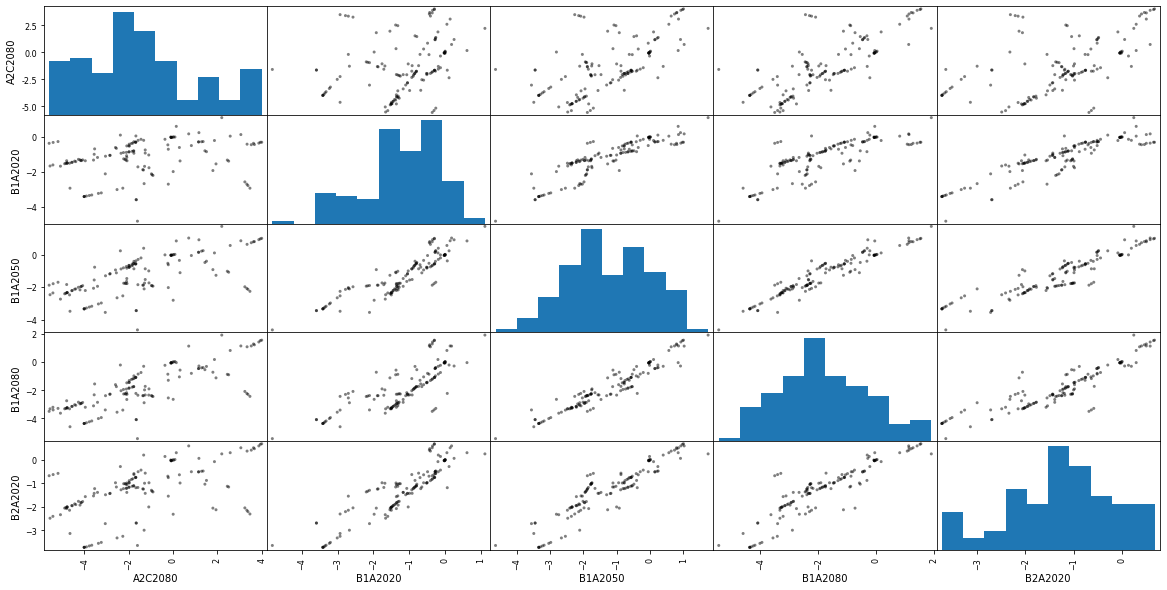

In [38]:
fig1 = pd.plotting.scatter_matrix(df_developing[['A2C2080','B1A2020','B1A2050', 'B1A2080', 
                                                'B2A2020']], c='black',
                                  figsize=(20, 10))

**Analysis for bivariate distributions of randomly chose scenarios:** From analyzing the various distributions of the randomly chosen features, we can see there are relatively high coorelations for certain variables. For example, we can see that the B2A2020 and B2A2080 features have a very high coorelation that looks to be around 0.7-0.9. From this, we can extrapolate that the prediction of crop yields from 2020 to 2080 are similar under the B2 family scenario. In other words, when the conditions of the B2 family are employed, crop yields seem to follow similar projections in 2020 and 2080. Moreover, we can see similar results from B1A2050/B2A2020, B2A2080/B1A2050, B1A2020/B2A2020. We can see low coorelations for certain features such as between B1A2020/A2C2080, B2A2050/A2C2080, and B1A2080/A2C2080. From this low coorelation, we can extrapolate that the A family scenarios do result in different crop yields than B family scenarios. In other words, placing more emphasis on climate change initiatives (B family) seems to result in less volatile changes in crop yields as compared to A family scenarios (which have emphasis on continued deprecation of the climate).

After drawing upon the conclusions mentioned above, we decided to create matrixes for each scenario in each year (creating 3 different matrixes for 2020, 2050, 2080). 

#### Matrixes for 2020 projections

In [39]:
wheat = [i for i in predictions_2020 if i in wheat_yield_change and '2b' not in i and '2c' not in i] 
maize = [i for i in predictions_2020 if i in maize_yield_change and '2b' not in i and '2c' not in i] 
rice = [i for i in predictions_2020 if i in rice_yield_change and '2b' not in i and '2c' not in i] 

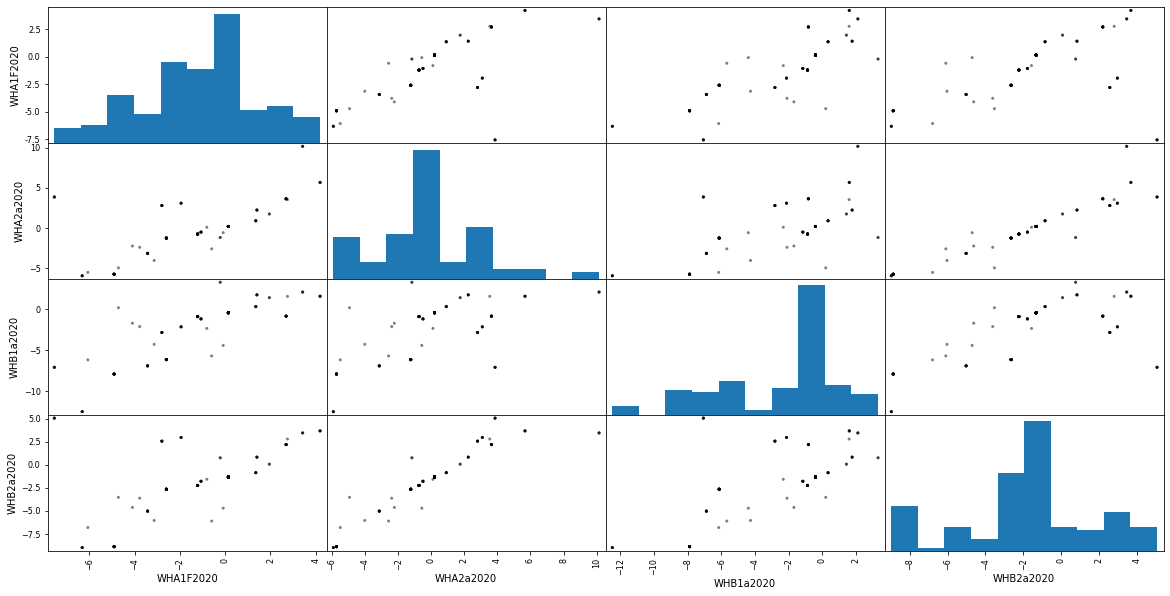

In [40]:
# Wheat Production coorelations
fig2 = pd.plotting.scatter_matrix(df_developing[wheat], c='black',
                                  figsize=(20, 10))

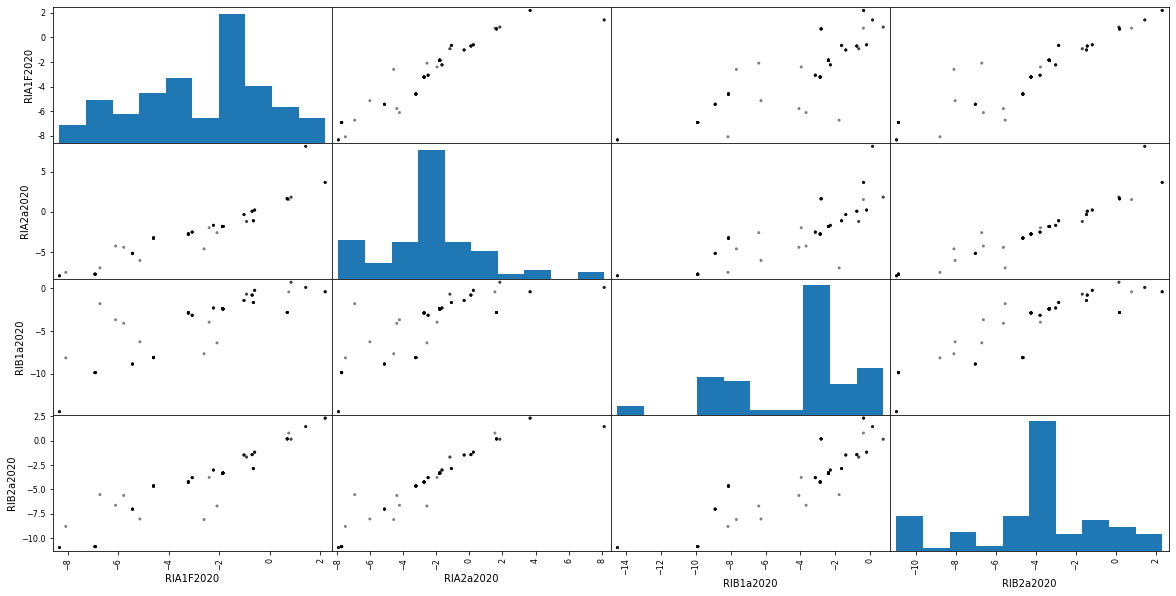

In [41]:
# Rice Production coorelations
fig3 = pd.plotting.scatter_matrix(df_developing[rice], c='black',
                                  figsize=(20, 10))

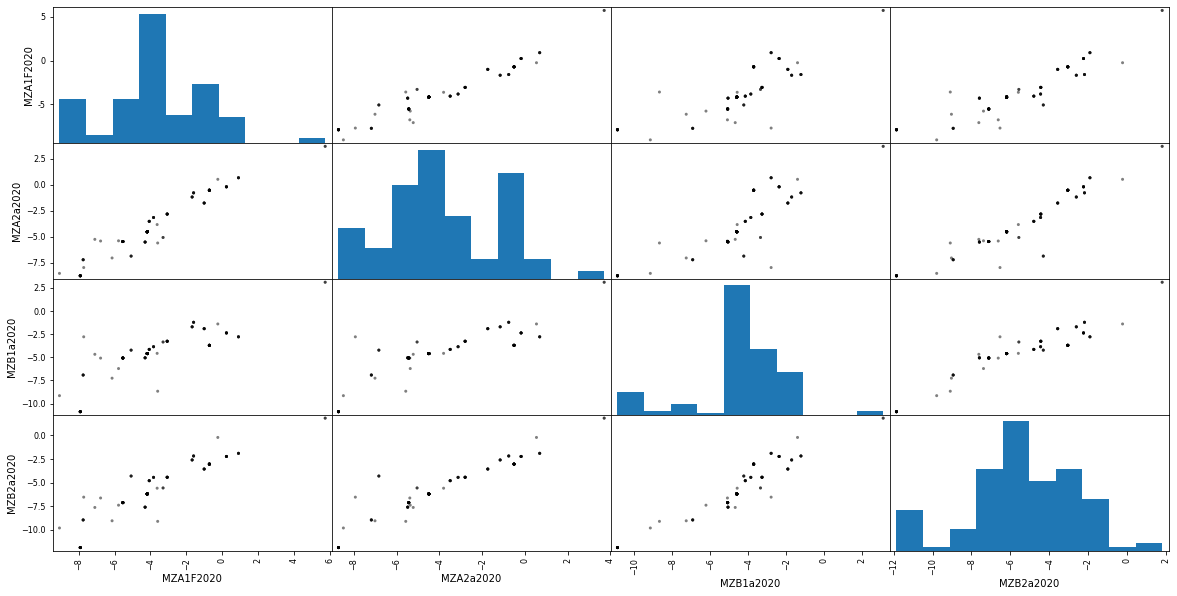

In [42]:
# Maize production coorelations
fig4 = pd.plotting.scatter_matrix(df_developing[maize], c='black',
                                  figsize=(20, 10))

**Matrix for 2050 projections**

In [43]:
wheat = [i for i in predictions_2050 if i in wheat_yield_change and '2b' not in i and '2c' not in i] 
maize = [i for i in predictions_2050 if i in maize_yield_change and '2b' not in i and '2c' not in i] 
rice = [i for i in predictions_2050 if i in rice_yield_change and '2b' not in i and '2c' not in i] 

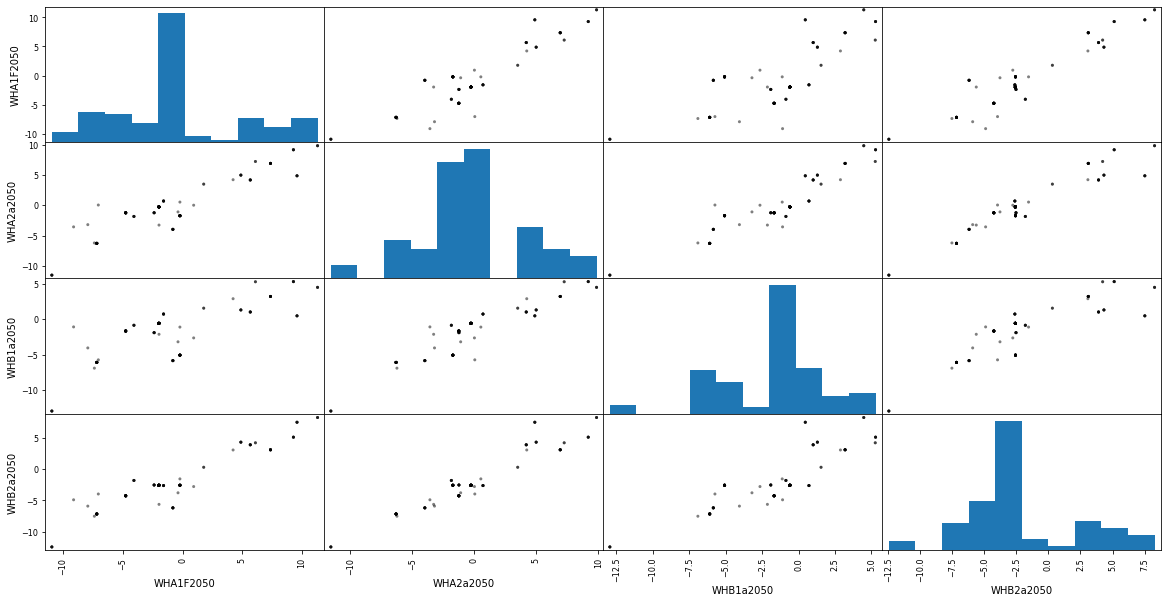

In [44]:
# Wheat Production coorelations
fig2 = pd.plotting.scatter_matrix(df_developing[wheat], c='black',
                                  figsize=(20, 10))

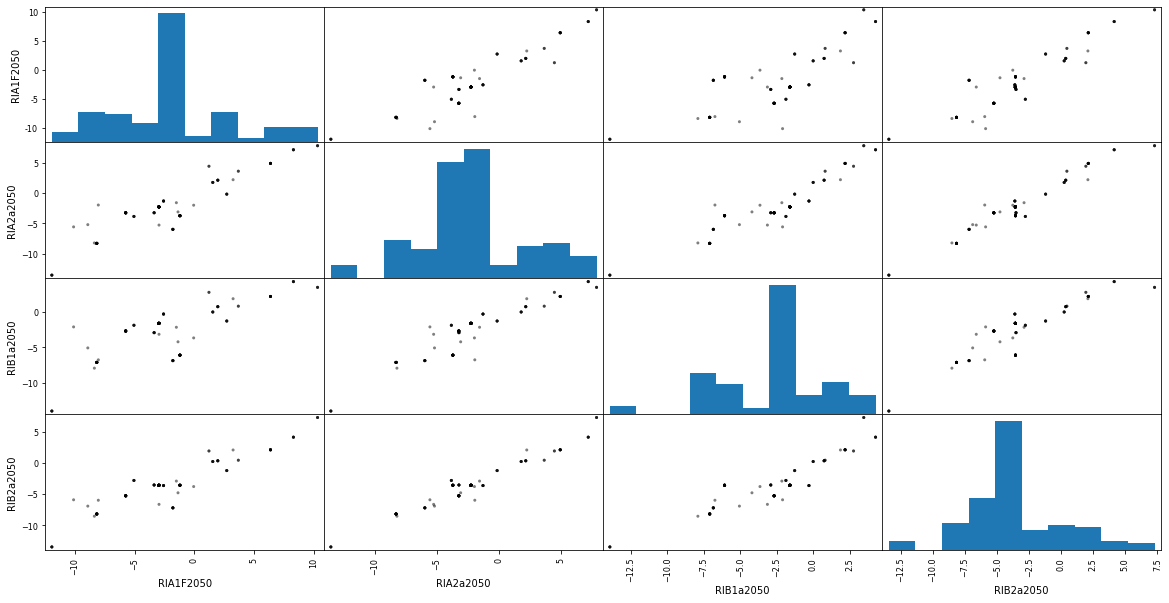

In [45]:
# Rice Production coorelations
fig3 = pd.plotting.scatter_matrix(df_developing[rice], c='black',
                                  figsize=(20, 10))

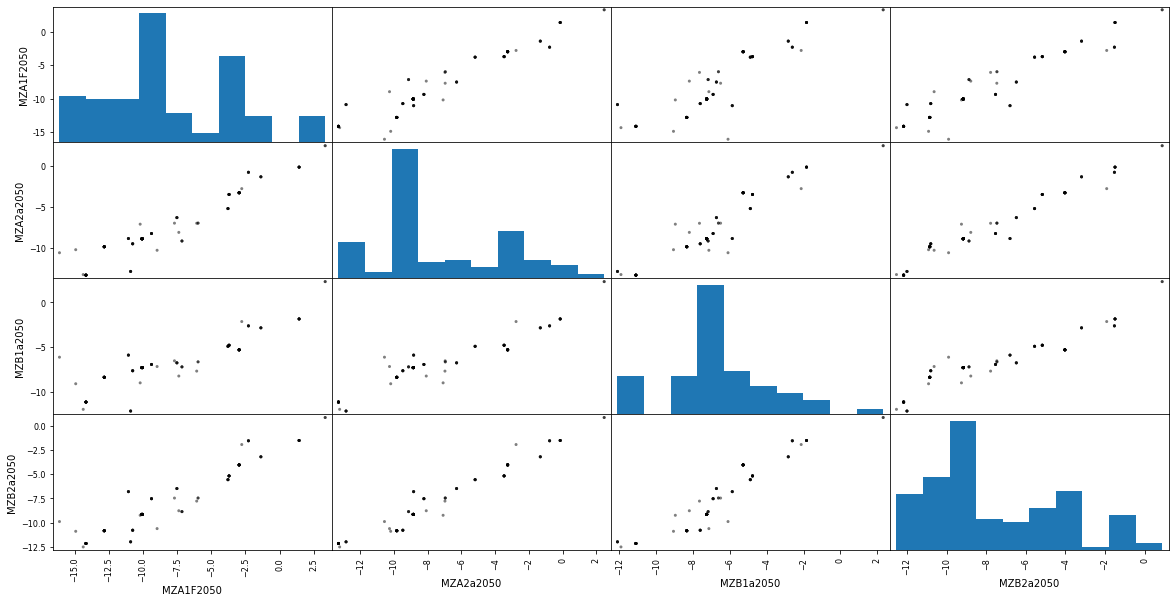

In [46]:
# Maize Production coorelations
fig4 = pd.plotting.scatter_matrix(df_developing[maize], c='black',
                                  figsize=(20, 10))

**Matrix for 2080 projections**

In [47]:
wheat = [i for i in predictions_2080 if i in wheat_yield_change and '2b' not in i and '2c' not in i] 
maize = [i for i in predictions_2080 if i in maize_yield_change and '2b' not in i and '2c' not in i] 
rice = [i for i in predictions_2080 if i in rice_yield_change and '2b' not in i and '2c' not in i] 

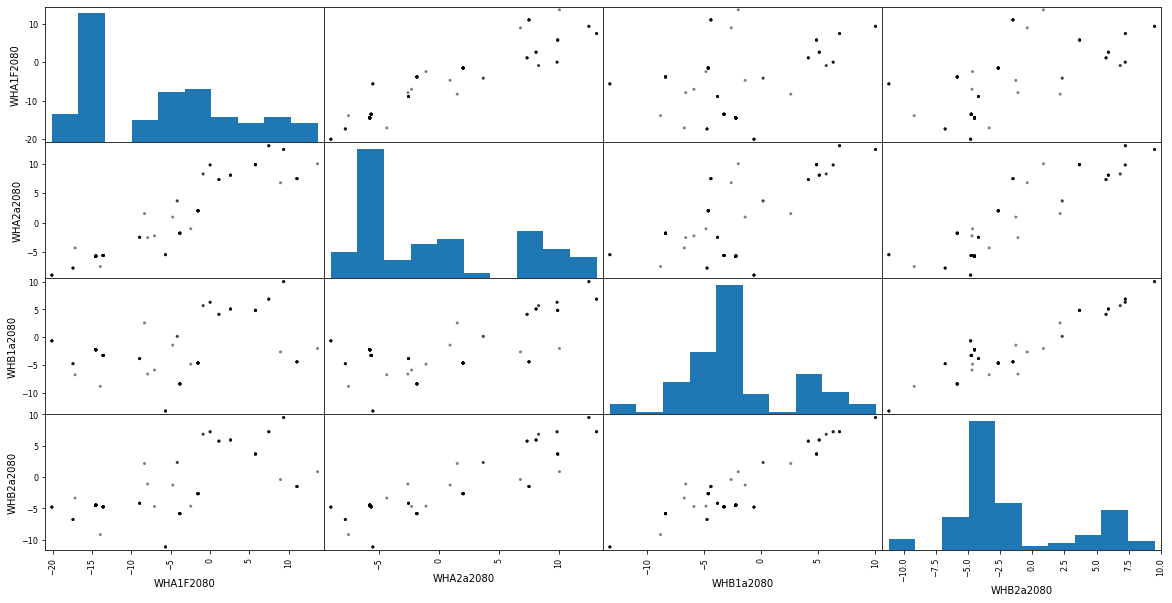

In [48]:
# Wheat Production coorelations
fig2 = pd.plotting.scatter_matrix(df_developing[wheat], c='black',
                                  figsize=(20, 10))

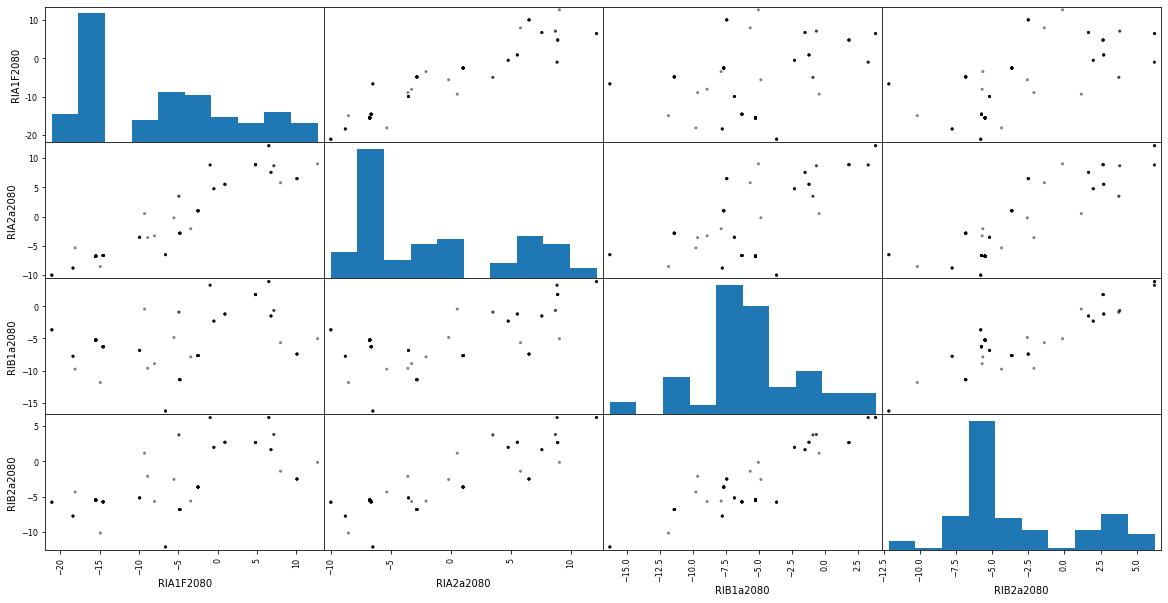

In [49]:
# Rice Production coorelations
fig3 = pd.plotting.scatter_matrix(df_developing[rice], c='black',
                                  figsize=(20, 10))

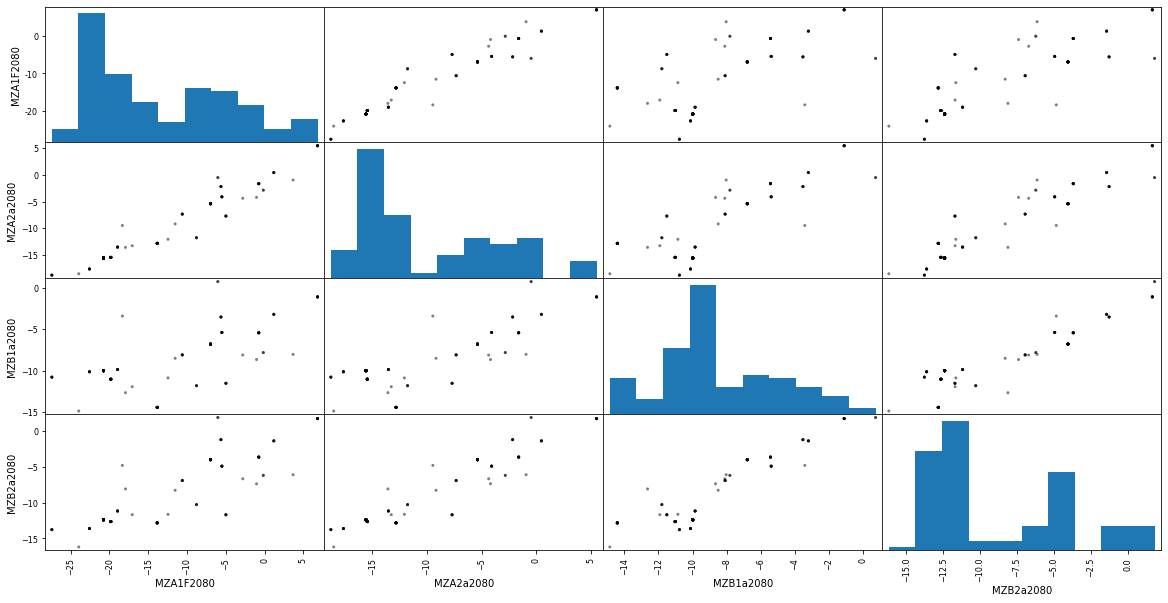

In [50]:
# Maize Production coorelations
fig4 = pd.plotting.scatter_matrix(df_developing[maize], c='black',
                                  figsize=(20, 10))

**Analysis for the 2020, 2050, and 2080 Projections of various crops:** One important finding from looking at the coorelations is that Maize projections tend to be more highly coorelated while wheat and rice tend to be less coorelated. Moreover, it seems that as time progresses, the coorelation beween variables decreases. This makes intuitive sense as time progresses crop yields under various scenarios changes more drastically betwen different variables. In other words, the scenarios have larger effects over time which makes intuitive sense. 

## Analysis

### Two Sample T Tests

To conduct further analysis, we first conduct two sample T tests int order to understand if the unknown population means of two groups (two different columns) are equal or not. We created a packaged function to conduct a ttest for two given columns.

**Assumptions**:

- The data values are independent as it is for each country and one country's output does not affect anothers
- The data is obtained from a random sample from the population
- Data in each group is normally distributed (as the sample sizes get larger the more normal the distributions for features will be). Moreover, since we are taking samples of n > 30, we can assume normality by the centarl limit theorem
- The data values are continous
- Since our variances are different, we decided to use Welch's test. 

In [51]:
# Ttest function that handles for changes in the assumption above
def packaged_ttest(col1, col2):
    sample_1 = df_developing[col1]
    sample_2 = df_developing[col2]
    return stats.ttest_ind(sample_1, sample_2, equal_var = False)
    

These are generalized null and alternative hypothesis, the difference for each experiment would be that scenarios refers to the specific scenarios we are testing on. 

Note: We decided to use a variation of different scenarios instead of sticking to one scenario three times in order to gain a larger picture of how A and B family scenarios interact. That is, instead of comparing A2A and B2A for the three different years, we also decided to test B2B and A2B because it lended to explain how these projections change in the future as well. Conducting a two sample t test on both the 2050 and 2080, we decided, would provide repetetive information. 

**Null Hypothesis**: μ1=μ2 (the population mean of both scenarios are equiavlent)

**Alternative Hypothesis**:μ1≠μ2 (the population mean of the two scenarios are different)

In [52]:
packaged_ttest('A2A2020', 'B2A2020')

Ttest_indResult(statistic=4.47840190834472, pvalue=1.1252516212304827e-05)

**Conclusion**: Our p-value of 1.12525e-05 is less than our alpha of 0.05, therefore we reject the null hypothesis that the means of the A2B scenario crop yield projection and B2A scenario weighted crop yield projection for the year 2020 are equivalent. We have evidence that supports the notion that the population mean of the two scenarios are statistically signfigantly different, but an experiment would have to be enacted to prove this to be certain. 

In [53]:
packaged_ttest('A2A2050', 'B2A2050')

Ttest_indResult(statistic=2.0102119066197233, pvalue=0.04545325967118226)

**Conclusion**: Our p-value of 0.0454 is less than our alpha of 0.05, therefore we reject the null hypothesis that the means of the A2B scenario weighted crop yield projection and B2B scenario weighted crop yield projection for the year 2050 are equivalent. We have evidence that supports the notion that the population mean of the two scenarios are statistically signfigantly different, but an experiment would have to be enacted to prove this to be certain.

In [54]:
packaged_ttest('A2A2080', 'B2B2080')

Ttest_indResult(statistic=2.125100312123019, pvalue=0.034530363912043435)

**Conclusion**: Our p-value of 0.0345 is less than our alpha of 0.05, therefore we reject the null hypothesis that the means of the A2A scenario weighted crop yield projection and B2B scenario weighted crop yield projection for the year 2080 are equivalent. We have evidence that supports the notion that the population mean of the two scenarios are statistically signfigantly different, but an experiment would have to be enacted to prove this to be certain.

**Discussion of results of two sample T-test:** It is interesting to the see than the for each year there was evidence that shows there was a statistically significant differance in means between A scenarios and B scenarios. While further experiments are necessary to prove this to be certain, it can be inferred that environmental conditions do have an impact on crop yields. B scenarios focus on environmental stability, while A scenarios are based on higher emissions of fossil fuels. From these T-test results we can see there is a statisticcally signifcant difference in crop yield means, which implies that crops under different scenarios, result in different average yields.

## Geospatial analysis

In [55]:
# Read shapefile using Geopandas
SHAPEFILE = 'ne_10m_admin_0_countries.shp'
geo_df = gpd.read_file(SHAPEFILE)[['ADMIN', 'ADM0_A3', 'geometry']]
# Rename columns.
geo_df.columns = ['country', 'country_code', 'geometry']
map_df = geo_df.merge(df, how = 'inner', left_on = 'country_code', right_on = 'ISO3v10')
map_df.drop(['BLS_2_Countries_(SRES)_ABBREVNAME', 'Fips_code', 'ISO3v10'], axis = 1, inplace = True)
# select the columns of interest
temp_df = map_df[['country', 'geometry', 'WH_2000', 'ActChWHA1F2080', 'ActChWHB2a2080']]
temp_df.head()

,country,geometry,WH_2000,ActChWHA1F2080,ActChWHB2a2080
0,Indonesia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",5.067142e+06,0.00,0.00
1,Malaysia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...",5.067142e+06,0.00,0.00
2,Chile,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...",1.723945e+06,-26121.15,-45591.83
3,Bolivia,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...",1.207546e+05,26.40,8734.21
4,Peru,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...",1.838274e+05,-2785.35,-4861.54


**To analyze the data:** We decided to graph the baseline yields on a global map (rice, wheat, and maize) as well as the 2080 projection for the A1FI and B2a scenarios as these are opposites (A1FI emphasizing a world without climate change solutions, and B2A representing a world where global solutions exist). 

#### Wheat Geospatial Analysis

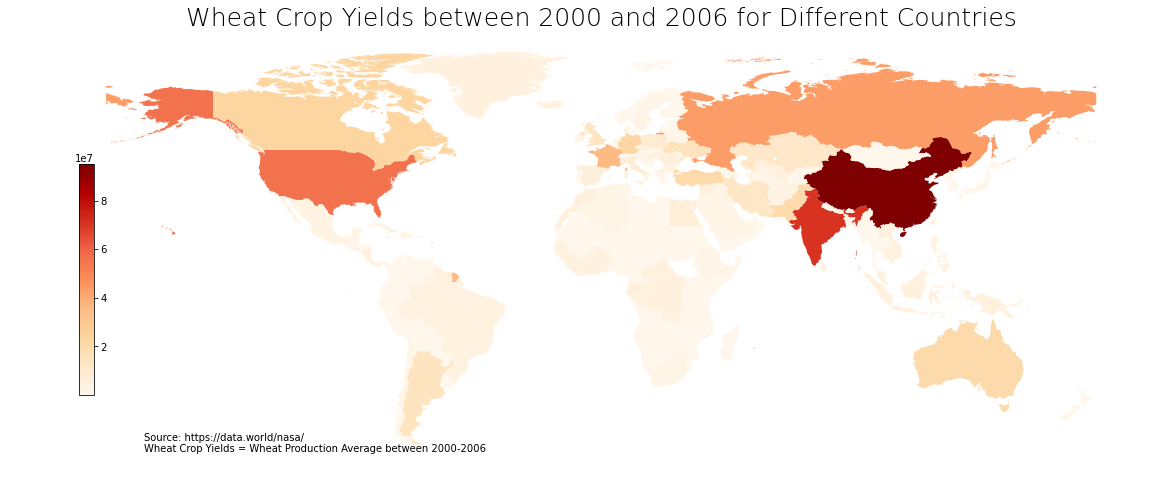

In [56]:
# Print the map
# Set the range for the choropleth
title = 'Wheat Crop Yields between 2000 and 2006 for Different Countries'
col = 'WH_2000'
source = 'Source: https://data.world/nasa/ \nWheat Crop Yields = Wheat Production Average between 2000-2006'
vmin = temp_df[col].min()
vmax = temp_df[col].max()
cmap = 'OrRd'

# Create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 8))

# Remove the axis
ax.axis('off')
temp_df.plot(col, ax=ax, cmap = cmap)
#                    edgecolor='0.8', linewidth=1, cmap=cmap)

# Add a title
ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '3'})

# Create an annotation for the data source
ax.annotate(source, xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', 
            verticalalignment='bottom', fontsize=10)
            
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)

# Empty array for the data range
sm._A = []

# Add the colorbar to the figure
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)

**Wheat 2080 Projection for A1FI Scenario**

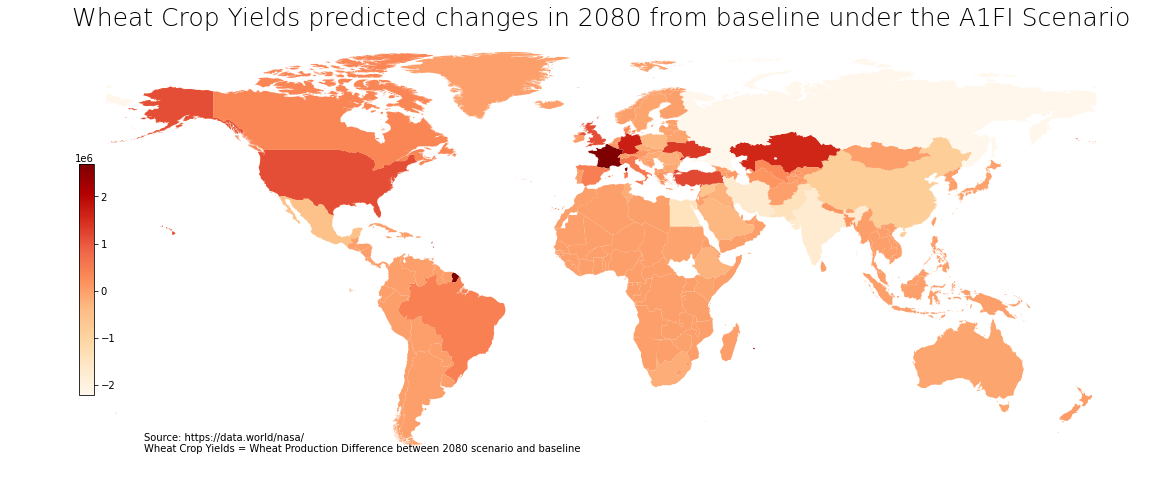

In [57]:
# Print the map
# Set the range for the choropleth
title = 'Wheat Crop Yields predicted changes in 2080 from baseline under the A1FI Scenario'
col = 'ActChWHA1F2080'
source = 'Source: https://data.world/nasa/ \nWheat Crop Yields = Wheat Production Difference between 2080 scenario and baseline'
vmin = temp_df[col].min()
vmax = temp_df[col].max()
cmap = 'OrRd'

# Create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 8))

# Remove the axis
ax.axis('off')
temp_df.plot(col, ax=ax, cmap = cmap)
#                    edgecolor='0.8', linewidth=1, cmap=cmap)

# Add a title
ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '3'})

# Create an annotation for the data source
ax.annotate(source, xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', 
            verticalalignment='bottom', fontsize=10)
            
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)

# Empty array for the data range
sm._A = []

# Add the colorbar to the figure
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)

**Wheat 2080 Projection for B2A Scenario**

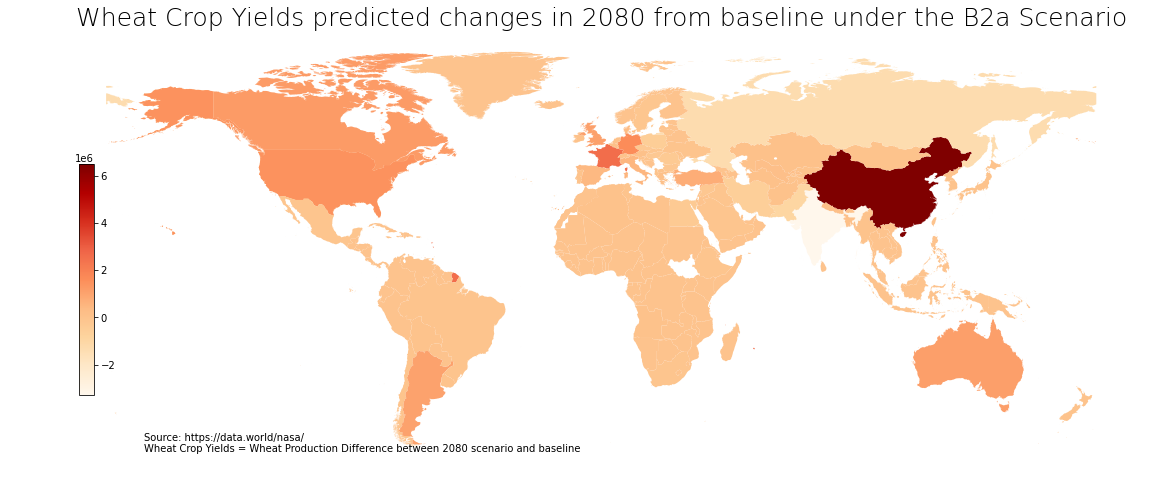

In [58]:
# Print the map
# Set the range for the choropleth
title = 'Wheat Crop Yields predicted changes in 2080 from baseline under the B2a Scenario'
col = 'ActChWHB2a2080'
source = 'Source: https://data.world/nasa/ \nWheat Crop Yields = Wheat Production Difference between 2080 scenario and baseline'
vmin = temp_df[col].min()
vmax = temp_df[col].max()
cmap = 'OrRd'

# Create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 8))

# Remove the axis
ax.axis('off')
temp_df.plot(col, ax=ax, cmap = cmap)
#                    edgecolor='0.8', linewidth=1, cmap=cmap)

# Add a title
ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '3'})

# Create an annotation for the data source
ax.annotate(source, xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', 
            verticalalignment='bottom', fontsize=10)
            
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)

# Empty array for the data range
sm._A = []

# Add the colorbar to the figure
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)

**Analysis of Wheat Geospatial Map:** When looking at the base map for what yields, we can see that there are 4 major countries that produce a ton of wheat, these being: China, India, Russia, and the United States the rest produce very little wheat yield and this is especially apparent in Africa and South America. Under the A1FI we see that there is a fair amount of growth in these underdeveloped nations predicted. Most countries look like they would benefit at least a tad bit from this, while the countries that would get harmed by it are ones that had a large wheat production to begin with. However with the B2a scenario we can see that most countries are not affected by the plan or are barely affected. There is an exception with China appearing to get massively larger wheat productions predicted. When deciding a plan for wheat the main difference between the two is that under the A1FI scenario it distributes the production to more countries. B2a on the other hand keeps most of the countries the same rather it just increases the amount of the countries that are already producing a large amount of wheat to produce more.

#### Rice Geospatial Analysis

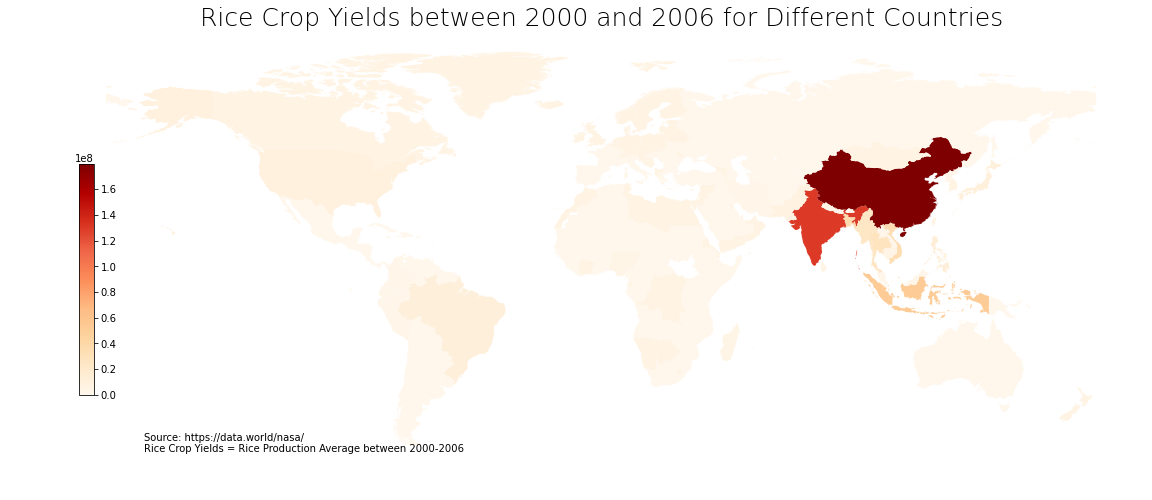

In [59]:
temp_df = map_df[['country', 'geometry', 'RI_2000', 'ActChRIAIF2080', 'ActChRIB2a2080']]
# Print the map
# Set the range for the choropleth
title = 'Rice Crop Yields between 2000 and 2006 for Different Countries'
col = 'RI_2000'
source = 'Source: https://data.world/nasa/ \nRice Crop Yields = Rice Production Average between 2000-2006'
vmin = temp_df[col].min()
vmax = temp_df[col].max()
cmap = 'OrRd'

# Create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 8))

# Remove the axis
ax.axis('off')
temp_df.plot(col, ax=ax, cmap = cmap)
#                    edgecolor='0.8', linewidth=1, cmap=cmap)

# Add a title
ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '3'})

# Create an annotation for the data source
ax.annotate(source, xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', 
            verticalalignment='bottom', fontsize=10)
            
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)

# Empty array for the data range
sm._A = []

# Add the colorbar to the figure
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)

**Rice 2080 Projection for A1FI Scenario**

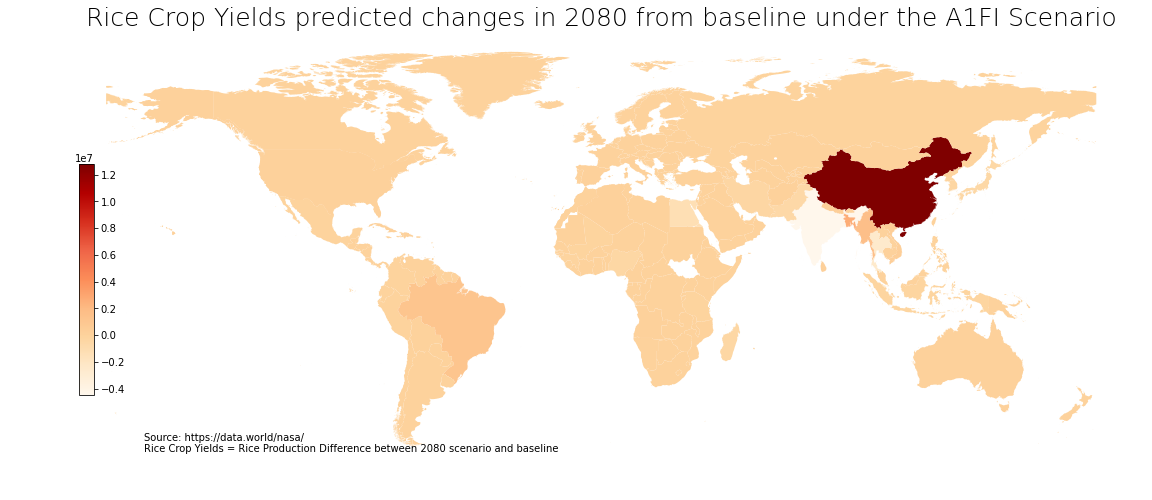

In [60]:
# Print the map
# Set the range for the choropleth
title = 'Rice Crop Yields predicted changes in 2080 from baseline under the A1FI Scenario'
col = 'ActChRIAIF2080'
source = 'Source: https://data.world/nasa/ \nRice Crop Yields = Rice Production Difference between 2080 scenario and baseline'
vmin = temp_df[col].min()
vmax = temp_df[col].max()
cmap = 'OrRd'

# Create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 8))

# Remove the axis
ax.axis('off')
temp_df.plot(col, ax=ax, cmap = cmap)
#                    edgecolor='0.8', linewidth=1, cmap=cmap)

# Add a title
ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '3'})

# Create an annotation for the data source
ax.annotate(source, xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', 
            verticalalignment='bottom', fontsize=10)
            
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)

# Empty array for the data range
sm._A = []

# Add the colorbar to the figure
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)

**Rice 2080 Projection for B2A Scenario**

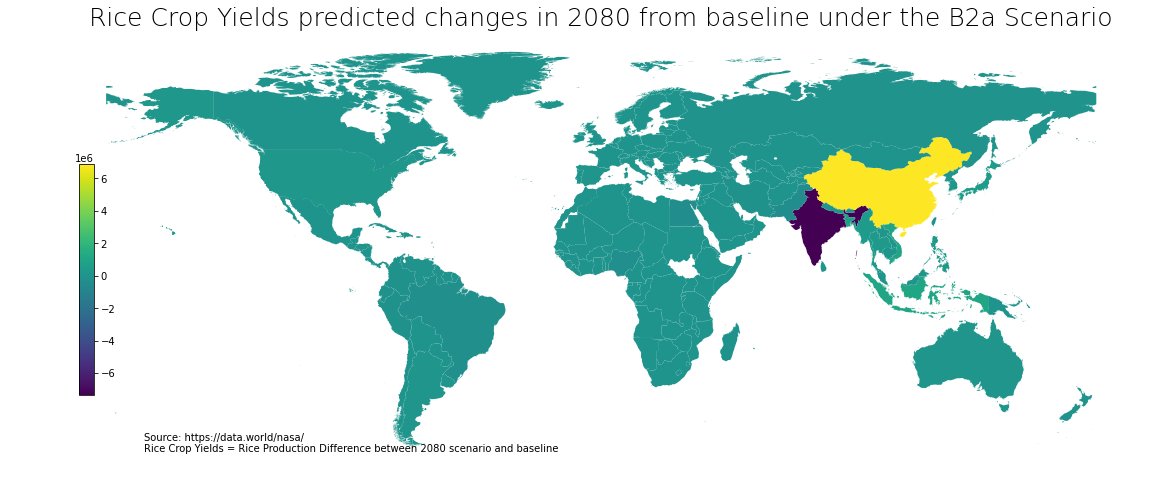

In [61]:
# Print the map
# Set the range for the choropleth
title = 'Rice Crop Yields predicted changes in 2080 from baseline under the B2a Scenario'
col = 'ActChRIB2a2080'
source = 'Source: https://data.world/nasa/ \nRice Crop Yields = Rice Production Difference between 2080 scenario and baseline'
vmin = temp_df[col].min()
vmax = temp_df[col].max()
cmap = 'viridis'

# Create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 8))

# Remove the axis
ax.axis('off')
temp_df.plot(col, ax=ax, cmap = cmap)
#                    edgecolor='0.8', linewidth=1, cmap=cmap)

# Add a title
ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '3'})

# Create an annotation for the data source
ax.annotate(source, xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', 
            verticalalignment='bottom', fontsize=10)
            
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)

# Empty array for the data range
sm._A = []

# Add the colorbar to the figure
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)

**Analysis of Rice Geospatial Map:** Looking at the Base Rice production map, Rice is really only produced in China, India and a bit in Indonesia. The rest of the map produces almost no rice in comparison to these nations. Now when we look at how the production is affected by the A1FI scenario we see that all the countries are affected roughly the same except for India and China. India loses production, while China massively benefits from this scenario. Every other country appears to remain around the same level of rice production. The B2a scenario is the same story as the A1FI. The main difference is that the difference between China and India is even bigger. For Rice both plans appear to have a similar effect so when deciding which one to go with it doesn’t matter too much but the A1FI had a much less drastic difference between China and India.



#### Maize Geospatial Analysis

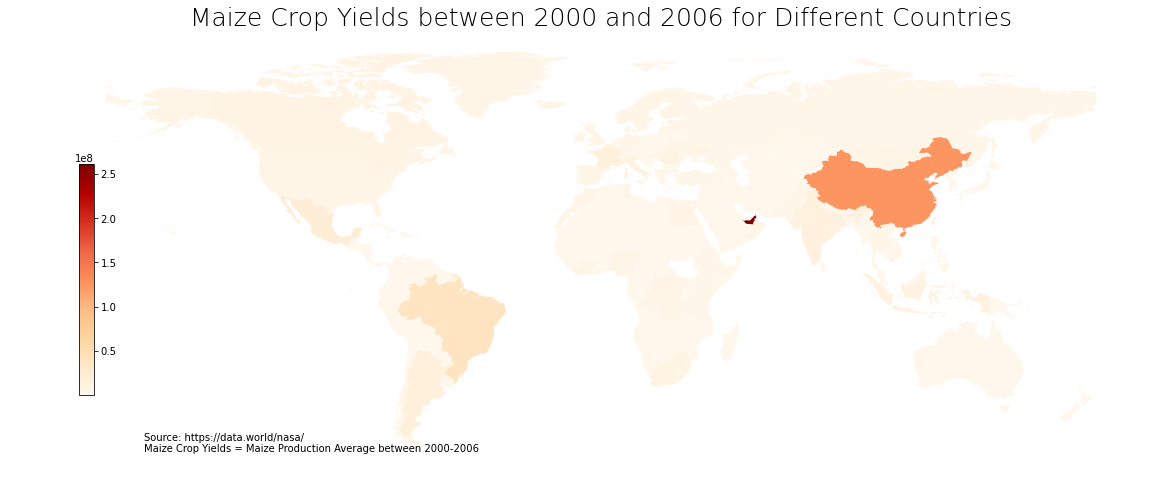

In [62]:
temp_df = map_df[['country', 'geometry', 'MZ_2000']]
# Print the map
# Set the range for the choropleth
title = 'Maize Crop Yields between 2000 and 2006 for Different Countries'
col = 'MZ_2000'
source = 'Source: https://data.world/nasa/ \nMaize Crop Yields = Maize Production Average between 2000-2006'
vmin = temp_df[col].min()
vmax = temp_df[col].max()
cmap = 'OrRd'

# Create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 8))

# Remove the axis
ax.axis('off')
temp_df.plot(col, ax=ax, cmap = cmap)
#                    edgecolor='0.8', linewidth=1, cmap=cmap)

# Add a title
ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '3'})

# Create an annotation for the data source
ax.annotate(source, xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', 
            verticalalignment='bottom', fontsize=10)
            
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)

# Empty array for the data range
sm._A = []

# Add the colorbar to the figure
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)

**Maize 2080 Projection for A1FI Scenario**

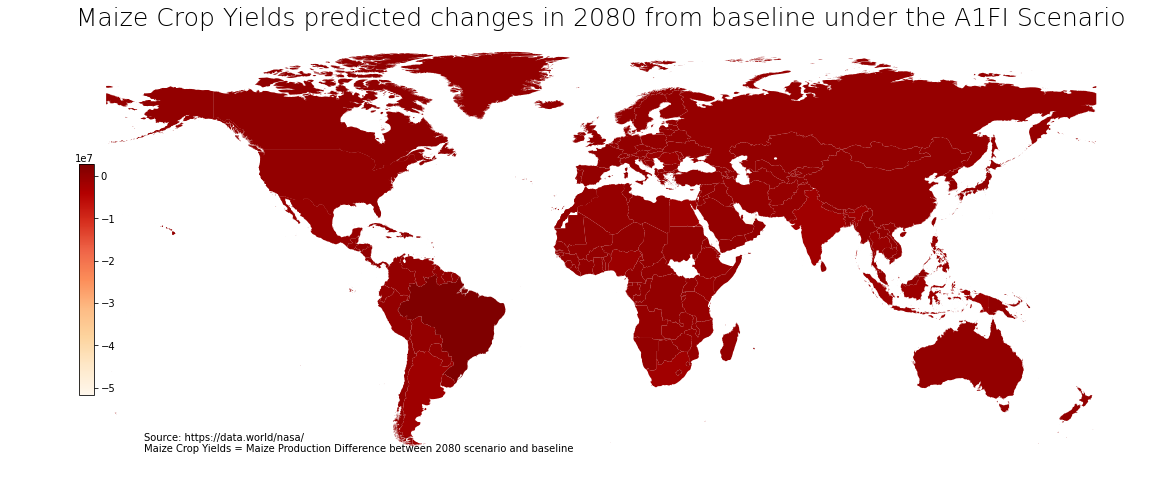

In [63]:
temp_df = map_df[['country', 'geometry', 'MZ_2000', 'ActChMZA1F2080', 'ActChWHB2a2080']]
# Print the map
# Set the range for the choropleth
title = 'Maize Crop Yields predicted changes in 2080 from baseline under the A1FI Scenario'
col = 'ActChMZA1F2080'
source = 'Source: https://data.world/nasa/ \nMaize Crop Yields = Maize Production Difference between 2080 scenario and baseline'
vmin = temp_df[col].min()
vmax = temp_df[col].max()
cmap = 'OrRd'

# Create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 8))

# Remove the axis
ax.axis('off')
temp_df.plot(col, ax=ax, cmap = cmap)
#                    edgecolor='0.8', linewidth=1, cmap=cmap)

# Add a title
ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '3'})

# Create an annotation for the data source
ax.annotate(source, xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', 
            verticalalignment='bottom', fontsize=10)
            
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)

# Empty array for the data range
sm._A = []

# Add the colorbar to the figure
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)

**Maize 2080 Projection for B2A Scenario**

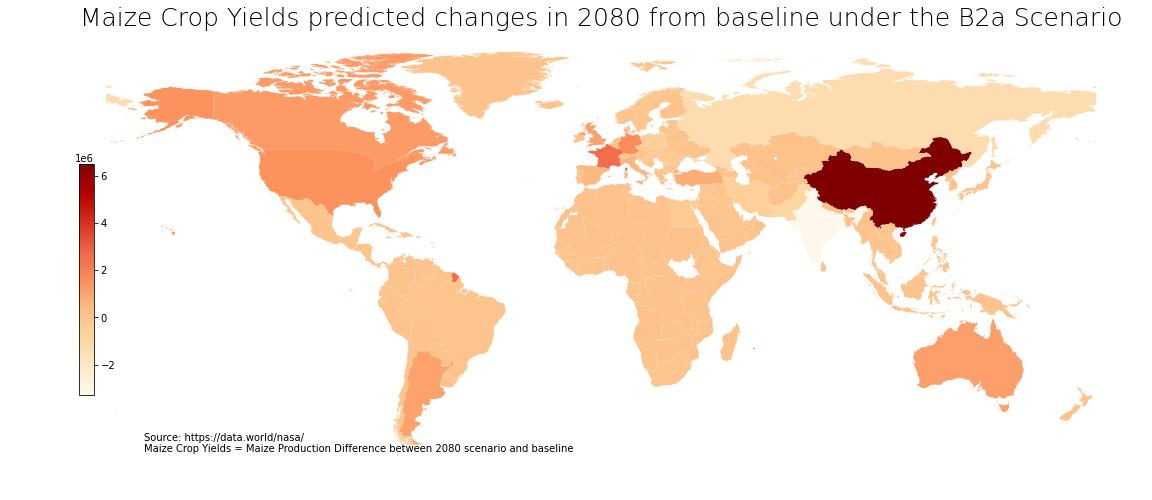

In [64]:
# Print the map
# Set the range for the choropleth
title = 'Maize Crop Yields predicted changes in 2080 from baseline under the B2a Scenario'
col = 'ActChWHB2a2080'
source = 'Source: https://data.world/nasa/ \nMaize Crop Yields = Maize Production Difference between 2080 scenario and baseline'
vmin = temp_df[col].min()
vmax = temp_df[col].max()
cmap = 'OrRd'

# Create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 8))

# Remove the axis
ax.axis('off')
temp_df.plot(col, ax=ax, cmap = cmap)
#                    edgecolor='0.8', linewidth=1, cmap=cmap)

# Add a title
ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '3'})

# Create an annotation for the data source
ax.annotate(source, xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', 
            verticalalignment='bottom', fontsize=10)
            
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)

# Empty array for the data range
sm._A = []

# Add the colorbar to the figure
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)

**Analysis of Maize Geospatial Map:** Maize production across the world is pretty low being near zero for a lot of countries. The only extreme cases are in the United Arab Emirates and China. China is the second highest produced with the UAE being the highest by a large margin. When looking at the map for the A1FI scenario most countries appear to have no change or if there is change it is very minute but is in the negative direction. The B2a scenario on the other hand is largely positive changes or neutral changes. We see many countries increase their production such as China, United States, Canada, and France all get a massive increase. For Maize production the B2a scenario appears to be the more effective plan in the long run.

### 3. Regression Aanalysis on single features

Use single feature to determine which features are important in predicting the weighted 2080 projection. Only looking at scenario A2A. 

                            OLS Regression Results                            
Dep. Variable:                A2A2080   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     59.56
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           2.67e-12
Time:                        22:36:59   Log-Likelihood:                -288.47
No. Observations:                 133   AIC:                             580.9
Df Residuals:                     131   BIC:                             586.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3866      0.228     -1.696      0.0

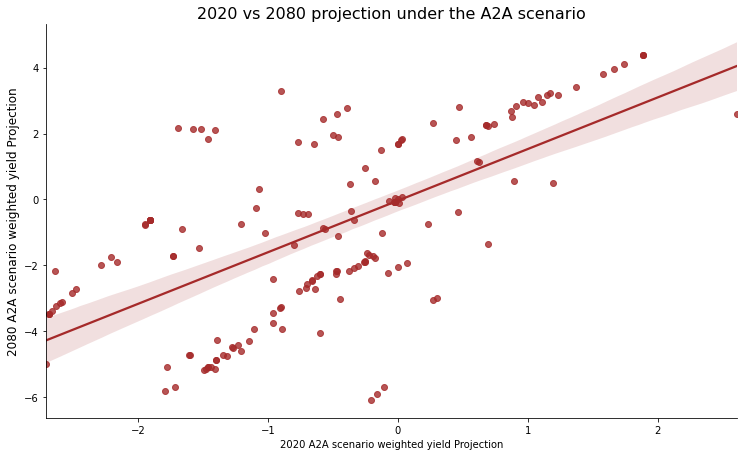

In [68]:
# carry out linear regression
temp = df_developing[['A2A2020', 'A2A2080']]
temp.columns = ['A2A2020', 'A2A2080']

outcome, predictors = patsy.dmatrices('A2A2080 ~ A2A2020', temp)

# Intialize an OLS linear model
# provides the data (does not actually compute the model)
mod_log = sm.OLS(outcome, predictors)

# fit
res_log = mod_log.fit()

# results
print(res_log.summary())

# Relationship between the Rice base line and crop yield prediction in 2020 (percent)
sns.lmplot(y = 'A2A2080',
           x = 'A2A2020',
           data = df, 
           fit_reg = True, 
           height = 6,
           aspect = 1.7, 
           line_kws={'color': 'brown'},
           scatter_kws={'color': 'brown'})
plt.ylabel('2080 A2A scenario weighted yield Projection', size=12)
plt.xlabel('2020 A2A scenario weighted yield Projection', size=10)
plt.title('2020 vs 2080 projection under the A2A scenario', size = 16);

                            OLS Regression Results                            
Dep. Variable:                A2A2080   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     195.5
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           9.33e-28
Time:                        22:37:02   Log-Likelihood:                -252.65
No. Observations:                 133   AIC:                             509.3
Df Residuals:                     131   BIC:                             515.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0150      0.173     -0.087      0.9

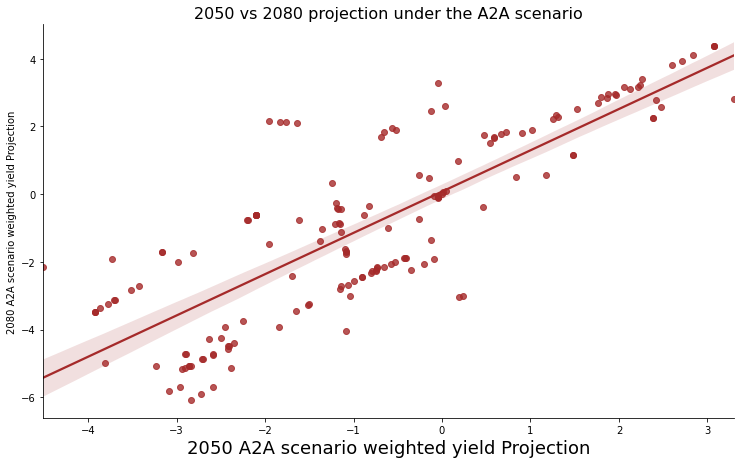

In [69]:
# carry out linear regression
temp = df_developing[['A2A2050', 'A2A2080']]
temp.columns = ['A2A2050', 'A2A2080']

outcome, predictors = patsy.dmatrices('A2A2080 ~ A2A2050', temp)

# Intialize an OLS linear model
# provides the data (does not actually compute the model)
mod_log = sm.OLS(outcome, predictors)

# fit
res_log = mod_log.fit()

# results
print(res_log.summary())

# Relationship between the Rice base line and crop yield prediction in 2020 (percent)
sns.lmplot(y = 'A2A2080',
           x = 'A2A2050',
           data = df, 
           fit_reg = True,  
           height = 6,
           aspect = 1.7, 
           line_kws={'color': 'brown'},
           scatter_kws={'color': 'brown'})
plt.ylabel('2080 A2A scenario weighted yield Projection', size=10)
plt.xlabel('2050 A2A scenario weighted yield Projection', size=18)
plt.title('2050 vs 2080 projection under the A2A scenario', size = 16);

**Analysis:** We can see that the two features we selected have high coorelations in predicting the 2080 projection. We see that both the features are signifigant as their p-values are both 0 which is less than our signfigance level of 0.05. Moreover, we can see that they have R^2 values (0.3 and 0.55) which means that around 0.3/0.55 (depending on which feature one is looking at) of the variation in the 2080 projection can be attributed to the 2020 and 2050 projections respectfully. We also investigated some features we expected to have smaller coorelations in order to determine which features would be useful in creating a machine learning model (presented later in this notebook). Most of these features seemed to have lower coorelations. 

Some examples of these features are presented below, our analysis of the plots below is that there are low coorelations, and high pvalues so using these features in our final model would most likely not be intellgient.

                            OLS Regression Results                            
Dep. Variable:                A2A2080   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     2.271
Date:                Wed, 08 Dec 2021   Prob (F-statistic):              0.134
Time:                        22:37:04   Log-Likelihood:                -312.25
No. Observations:                 133   AIC:                             628.5
Df Residuals:                     131   BIC:                             634.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5278      0.234     -6.540      0.0

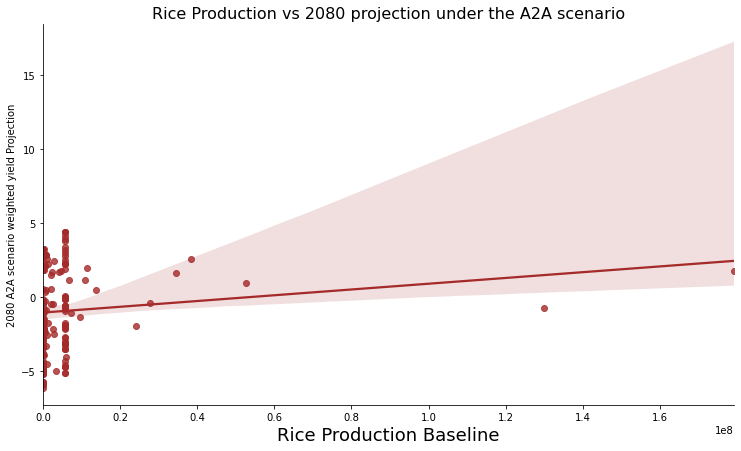

In [70]:
# carry out linear regression
temp = df_developing[['RI_2000', 'A2A2080']]
temp.columns = ['RI_2000', 'A2A2080']

outcome, predictors = patsy.dmatrices('A2A2080 ~ RI_2000', temp)

# Intialize an OLS linear model
# provides the data (does not actually compute the model)
mod_log = sm.OLS(outcome, predictors)

# fit
res_log = mod_log.fit()

# results
print(res_log.summary())

# Relationship between the Rice base line and crop yield prediction in 2020 (percent)
sns.lmplot(y = 'A2A2080',
           x = 'RI_2000',
           data = df, 
           fit_reg = True,  
           height = 6,
           aspect = 1.7, 
           line_kws={'color': 'brown'},
           scatter_kws={'color': 'brown'})
plt.ylabel('2080 A2A scenario weighted yield Projection', size=10)
plt.xlabel('Rice Production Baseline', size=18)
plt.title('Rice Production vs 2080 projection under the A2A scenario', size = 16);

                            OLS Regression Results                            
Dep. Variable:                A2A2080   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.807
Date:                Wed, 08 Dec 2021   Prob (F-statistic):              0.181
Time:                        22:37:06   Log-Likelihood:                -312.48
No. Observations:                 133   AIC:                             629.0
Df Residuals:                     131   BIC:                             634.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5516      0.244     -6.361      0.0

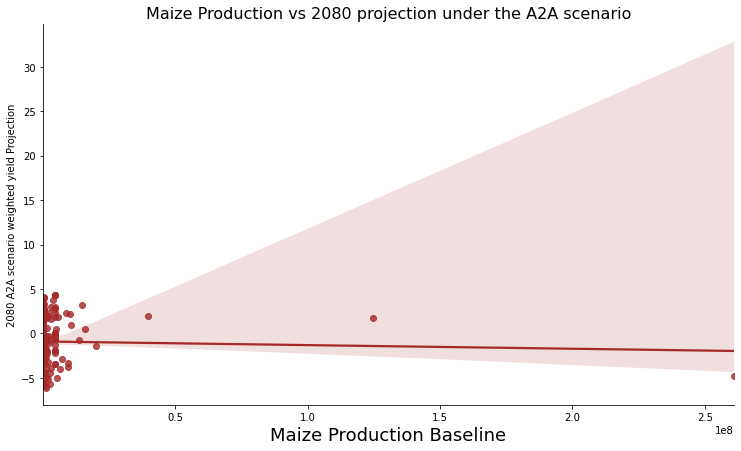

In [71]:
# carry out linear regression
temp = df_developing[['MZ_2000', 'A2A2080']]
temp.columns = ['MZ_2000', 'A2A2080']

outcome, predictors = patsy.dmatrices('A2A2080 ~ MZ_2000', temp)

# Intialize an OLS linear model
# provides the data (does not actually compute the model)
mod_log = sm.OLS(outcome, predictors)

# fit
res_log = mod_log.fit()

# results
print(res_log.summary())

# Relationship between the Rice base line and crop yield prediction in 2020 (percent)
sns.lmplot(y = 'A2A2080',
           x = 'MZ_2000',
           data = df, 
           fit_reg = True,  
           height = 6,
           aspect = 1.7, 
           line_kws={'color': 'brown'},
           scatter_kws={'color': 'brown'})
plt.ylabel('2080 A2A scenario weighted yield Projection', size=10)
plt.xlabel('Maize Production Baseline', size=18)
plt.title('Maize Production vs 2080 projection under the A2A scenario', size = 16);

                            OLS Regression Results                            
Dep. Variable:                A2A2080   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     3.686
Date:                Wed, 08 Dec 2021   Prob (F-statistic):             0.0571
Time:                        22:37:07   Log-Likelihood:                -311.55
No. Observations:                 133   AIC:                             627.1
Df Residuals:                     131   BIC:                             632.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.6343      0.248     -6.590      0.0

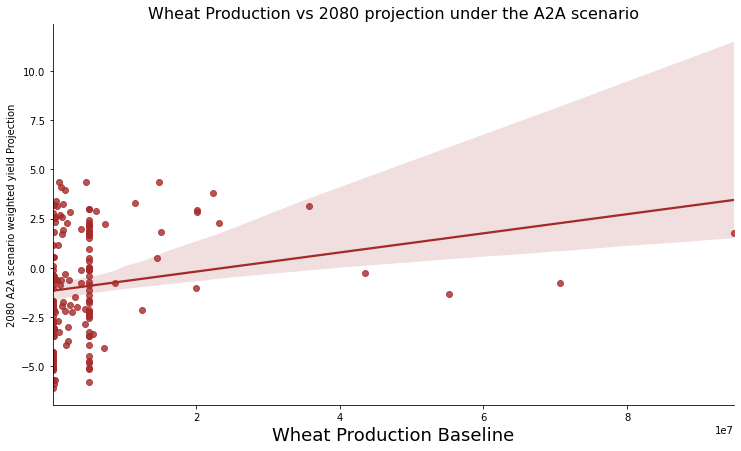

In [72]:
# carry out linear regression
temp = df_developing[['WH_2000', 'A2A2080']]
temp.columns = ['WH_2000', 'A2A2080']

outcome, predictors = patsy.dmatrices('A2A2080 ~ WH_2000', temp)

# Intialize an OLS linear model
# provides the data (does not actually compute the model)
mod_log = sm.OLS(outcome, predictors)

# fit
res_log = mod_log.fit()

# results
print(res_log.summary())

# Relationship between the Rice base line and crop yield prediction in 2020 (percent)
sns.lmplot(y = 'A2A2080',
           x = 'WH_2000',
           data = df, 
           fit_reg = True,  
           height = 6,
           aspect = 1.7, 
           line_kws={'color': 'brown'},
           scatter_kws={'color': 'brown'})
plt.ylabel('2080 A2A scenario weighted yield Projection', size=10)
plt.xlabel('Wheat Production Baseline', size=18)
plt.title('Wheat Production vs 2080 projection under the A2A scenario', size = 16);

## 4. Taking a step ahead: Regression ML Model to Predict 2080 Crop Weighted Crop Yields

The next step we decided to take was to try and predict 2080 weighted yield projections given the 2020 and 2050 projections as well as the baseline for wheat, rice, and maize. We began with trying to predict on the A2A scenario, and packaged our code into a function to apply to various different scenarios. We used to model that performed the best for the A2A scenario (Random forest regressor) and used the same hyperparamters across all models. 

In [73]:
# we will use all of the data (not just developed) so that we can make more accurate predictions
y = df['A2A2080']
x = df[['A2A2050', 'A2A2020', 'WH_2000', 'RI_2000', 'MZ_2000']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [74]:
reg = linear_model.LinearRegression()
regr = RandomForestRegressor(max_depth=6)
model = reg.fit(X_train, y_train)
mod = regr.fit(X_train, y_train)
predictions = reg.predict(X_test)
prediction_rf = regr.predict(X_test)

Text(0.5, 1.0, 'Linear Regressor Predictions')

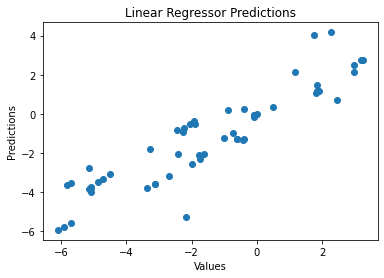

In [75]:
plt.scatter(y_test, predictions)
plt.xlabel('Values')
plt.ylabel('Predictions')
plt.title('Linear Regressor Predictions')

Text(0.5, 1.0, 'Random Forest Regressor Predictions')

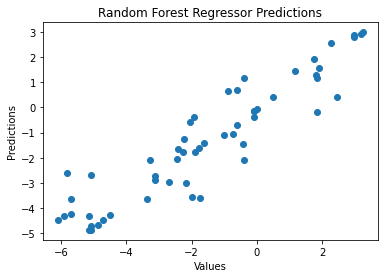

In [76]:
plt.scatter(y_test, prediction_rf)
plt.xlabel('Values')
plt.ylabel('Predictions')
plt.title('Random Forest Regressor Predictions')

In [77]:
scores_linear = cross_val_score(reg, x, y, cv=3)
scores_rf = cross_val_score(regr, x, y, cv=3)
(np.mean(scores_linear), scores_linear.std()), (np.mean(scores_rf), scores_rf.std())

((0.7450855796904019, 0.044332501039910543),
 (0.8396711136255225, 0.053982809109045946))

**Discussion on model selection:** We decided to use the random forest regressor as it seemed to perform much better in terms of accuracy than the linear regressor (about 10 points higher on average). To ensure it was not overfitting, we cross validated the model and received a standard deviation of around 5 percent for the random forest regressor which was similar to the variation in the linear regressor (4 percent). Consuqeuntly, we decided that overfitting was not occuring, and the model was doing a fair job in predicting 2080 2080 weighted crop yield data.

In [78]:
def pipeline(scenario, split):
    y = df[scenario + '2080']
    x = df[[scenario + '2050', scenario + '2020', 'WH_2000', 'RI_2000', 'MZ_2000']]
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=split)
    regr = RandomForestRegressor(max_depth=6)
    mod = regr.fit(X_train, y_train)
    scores_rf = cross_val_score(regr, x, y, cv=3)
    return (np.mean(scores_rf), scores_rf.std())

In [79]:
pipeline('A1FI', 0.33)

(0.7762170416336525, 0.014418435985319741)

In [80]:
pipeline('A2A', 0.33)

(0.828246775501404, 0.06339399407745923)

In [81]:
pipeline('A2B', 0.33)

(0.8154604497472203, 0.03076279315341924)

In [82]:
pipeline('A2C', 0.33)

(0.6986527835912965, 0.06974109577394255)

In [83]:
pipeline('B2A', 0.33)

(0.9198166764951993, 0.01577697453052858)

In [84]:
pipeline('B2B', 0.33)

(0.7571131940169904, 0.04383925632756564)

**Discussion on Machine Learning Model Results and Takeaways:** We can see from the results on various scenarios that our model performs relatively well (from 70% to up to 91%!). Another takeaway is that our standard deviations are generally pretty low (with the exception of the A2C model having a std. of 8% which is too high for an accurate model). Using this model, those who study emissions can make projections on how the world will look like under various scenarios. For example, in the year 2050 someone could use this model and adjust the training data to reflect the accurate real world instead of the projections. As time goes on and more concurent data is filled within the model, the more accurate it can become. For now, this model is useful in predicting how the world will look like by the year 2080 under various climate change scenarios given projections from 2020, 2050, and the baseline crop data in 2000. One other interesting finding is that the model seems to perform better on B family scenarios, which may indicate that these are crop yields are more predictable and less volatile (demonstrated by a low standard deviation).

## 5. Taking another Step Forward: Classifying a Country as Developing or Developed

Having created a model that predicts the actual weighted crop yield prediction in 2080, we decided to next try and see if we could identify whether a country was developing or developed based on their projections, baselines, and distribution of crop growth (how much of one crop is grown in comparison to total crop yield)

In [85]:
# Need to create a labeled data set which can be easily done by extrapolating some steps done in data cleaning
# 1 is developed while 0 is developing
df['classification'] = df['BLS_2_Countries_(SRES)_ABBREVNAME'].isin(developed)
df['classification'] = df['classification'].astype(int)
# Create x and y data sets for model training
y = df['classification']
temp = df.drop(['BLS_2_Countries_(SRES)_ABBREVNAME', 'classification', 'Fips_code', 'ISO3v10', 'COUNTRY'], axis = 1)
x = temp.copy()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
# Initialize Classifier
# Adjusting the class weight to handle for the imbalanced nature of developed vs developing countryes
clf = LogisticRegression(class_weight = {0:0.8, 1:0.2})
# Fit model
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) 
confusion = confusion_matrix(y_test, y_pred)
print('The accuracy of our model on the test set is:' + str(accuracy_score(y_test, y_pred)))
confusion

The accuracy of our model on the test set is:0.8484848484848485


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[25,  1],
       [ 4,  3]])

In [86]:
accuracy = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
accuracy[accuracy['Real Values'] != accuracy['Predicted Values']]

,Real Values,Predicted Values
120,1,0
77,1,0
12,1,0
153,1,0
113,0,1


In [87]:
cross_val_score(clf, x, y, cv=3).mean()

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

0.8181818181818182

In [98]:
feature_importances = clf.coef_
a = feature_importances.flatten()
x[x.columns[np.argmax(a)]]

0      41832.362236
1      41832.362236
2          0.000000
3      41832.362236
4      41832.362236
           ...     
160        0.000000
161        0.000000
162        0.000000
163    -2632.680000
164     -116.590000
Name: ActChRIAIF2080, Length: 165, dtype: float64

**Analysis of feature importances:** We can see that the most important feature is the rice projection of 2080 under the AIF scenario. This indicates that a key distinguisher between developed and developing countries is there actual yields of crops in 2080 under an A family scenario. Therefore, we can extrapolate that a world in which climate degradation continues, the distinction between developing and developed countries seems to get larger.

**Discussion and takeaways from classification model:** While creating the classification model, we were able to create a model that is accurate about 82% of the time. We know the model is not overfit as we use 3 k-folds to validate the accuracy of our model. From investigating where the model goes wrong, we can see the the model identifies Alaska as a developing country. Alaska is a different "country" in our dataset as it runs independently from the United States in terms of crop production. It is not suprising that our model considers it a developing country because the key features of Alaska (rice, wheat, maize production) all are typical of a developing country. One problem with the model that could arise is that there are much more developing countries than developed countries. Conseuqently, if our model were to predict only developing for every country the accuracy would still be around 70-80%. To ensure this was not happening, we minimized the False Negative Rate (where a country was identified as developing but it was actually a developed country). To do this, we changed the classweight paramter to adjust for the unbalanced nature of the data. Overall, the biggest takeaway and useful from this model is that we can see the relative feature importances by taking the .coef_ of the model. Storing these features importances in a list where the index corresponds to the column of the feature importance, we can see which features are most important in determining the distinctions between developing and developed countries. From this information, future research could investigate these distinctions to understand the difference in climate change effects from emissions between developed and developing countries.

# Ethics & Privacy

This section will be used to address common ethics and privacy concerns:

We believe that there aren't any biases/privacy/terms of use issues with the data we proposed. The data set was from a highly reputable source as it comes directly from NASA. Our data doesn't involve human beings, and crop yields are easily accessible public information (anyone can find the data on NASA's website), so privacy was not a major concern in the scope of this project. To our knowledge, there isn't bias in our data but it is possible that crop yield numbers could be misreported for certain countries as NASA is a United States organization and may not have access to every data point in the world. However, since our project is about comparing developed and developing countries at large, looking at specific countries is beyond the scope of this project and the possible minute fallabilities within the data have miniscule impact on the results of our report. Thus, a alterations in a country's data will have little to no impact on our results. Because of this, there was no need to detect these specifics biases throughout the completion of our data. There is one slight ethical concern in terms of how we classify a country as developed and developing. Since its can be shaming to a country to be categorized as a undeveloped country, it is important that we proceed with caution in applying our model confidently to the state of a country (developed or developing). To eliminate any bias in selecting what countries are underdeveloped while we manually labeled the data, we used the human development index to determine which countries are developed. Another problem could lie in our machine learning model which can predict which country is developing. Since our model isn't 100% accurate false declaration could easily lead to negative consequences. To address this the classification model should only be used generally to understand which features are distinguishing between developed and developing countries rather than trying to predict the state of a country by the year 2080. 

# Conclusion & Discussion

The goal of the project was to answer whether it was possible to predict the supply of crops of developing countries under different environmental scenarios and whether there was a signficant difference in the supply under different scenarios. We attempted to accomplish this by examining relationships between current crops yields, and also the relationships between projections of crop yield data for the years 2020, 2050, 2080 under different scenarios. Our results showed that there was statisticcally significant difference between mean yields of crops under different scenarios for years 2020, 2050, 2080. We were also able too make a machine learning model that predicted actual yield in 2080.

We started our study by using Nasa's crop yields dataset, that contained crop yield data for wheat, rice, maize under difference scenarios for years 2020, 2050, 2080. These difference scenarios can be categorized into 'A' scenarios which in general are less environmental friendly situations that emphasize emissions and fossil fuels, and 'B scenarios' which in general are more environmental friendly sitiuations that emphasize environmental sustainabiity and clean technology. We first analayzed the distribution of baseline data from 2000-2006, and in doing so we found outliers. We then analyzed the distribution of 2020 predicted data under various scenarios, and found that the wheat distribution was much more volatile. Doing the same for the 2050 data, we found that the distribution of all crops were much more volatile. We also found that there was a correlation with 'A1F1' scenarios and negative yields for each crops. For 2080, we had similar results. We then analyzed the distribution of weighted yields for each of the three years under different scenarios. Our results show in this case that A family scenarios yields are centralized around a 0 mean, while B scenario yields are centralized around negative means suggesting that over time B scenarios weighted yields decreased. We then next analyzed bivariate distributions between crops and found that over time there was less correlation between crops. This implies that the different scenarios have a variable impact over time. We then did a Two sample T-test, which found that the means between A scenarios and B scenarios were statistically significant. This implies that there is a significant difference in yields between A scenarios and B scenarios. We also created geospatial maps to illustrate the effect of different scenarios over time on different regions' crop production. Using these maps we were able to see the two different scenarios and how they affect developing and developed countries. Most of the developing countries have a similar production for all of the different crops and in general this was lower than the other developed countries. We also see that developed countries are largely the ones who benefit the most under most scenarios and keep their higher level of production compared to most developing countries. To go above and beyond, we then  produced a machine learning model that can predict the actual yield in 2080 for a country, with an accuracy of 70% to 91%. We also produced a classification model that determines whether a country is developed or not which is important in finding the distinguishing factors between a developed and developing country. Overall our results suggest to us that there is a significant difference in yields for years 2020, 2050, 2080 between A scenarios and B scenarios. However, we need to do further experimentation to find causation.

The limitations for this project are that we can not make any definitive claims since correlation doesn't imply causation. This means that to solidify our results and create strong conclusions it is necessary to experiment further. Another limitation is that we had to fill missing data with mean imputation. This could skew our data and potentially impact our results and conclusions. One other limitation is our data is primarily predicted data especially data on 2020,2050,2080. The drawback to this is that our conclusions and analysis are on predicted data rather than actual data. One way to further this project is analyze other crops, or focus analysis on a certain region rather than categorizing a country based on development. Moreover, changing the data from projection to real data (once that year arises) could lead to more accurate analysis and machine learning models. 

Our Project will be impact society by providing insight on how environmental conditions will affect crop yield in the future. Our Project illuminates that over time there is a significant difference in crop yields between environmentally friendly conditions versus non-environmentally friendly conditions, and that an environmentally stable world (B family scenarios) produces less volatile crop yields that seems to aid developing countries (although this is not definitive). 

# Team Contributions

Vineet

- Hypothesis, Found Data, Data Cleaning, EDA, Regression Analysis, ML (regression and classification), Conclusion/Discussion

Kyle

- Background/Prior work, Data Cleaning, EDA, Geospatial Analysis, Conclusion/Discussion

Arturo

- Overview, Research Question, Data Cleaning, Geospatial Analysis, Presentation Creative Director

Anudeep

- Background/Prior work, Overview, T-tests, Ethics and Privacy, Conclusion/Discussion